In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import plotly.graph_objects as go
from datetime import date
from datetime import datetime
from matplotlib import style
from wordcloud import WordCloud
import matplotlib.pyplot as plt

style.use('ggplot')
import seaborn as sns
import warnings
from statistics import mean
warnings.filterwarnings('ignore')


In [68]:
pp = pd.read_csv(r"/Users/lindseytam/Desktop/2016_US_ELECTION.csv") 

FileNotFoundError: File b'/Users/lindseytam/Desktop/2016_US_ELECTION.csv' does not exist

# Election Data:
Graph political leanings of each state based on 2016 election

In [158]:
def county_leaning(state_code, county):
    
    state_data = pp.loc[(pp["StateCode"] == state_code) & (pp["CountyName"] == county)]
    tot_vote = state_data["CountyTotalVote"][1]
    GOP_vote = state_data.loc[state_data["Candidate"] == "Trump"]["VoteCount"].values[0] / tot_vote
    DEM_vote = state_data.loc[state_data["Candidate"] == "Clinton"]["VoteCount"].values[0] / tot_vote
    return state_data

In [159]:
GOP_vals = []
DEM_vals = []
GRN_vals = []
LIB_vals = []
CST_vals = []
TOT_vals = []


def get_voter_info(state):
    
    R_count = 0
    D_count = 0
    G_count = 0
    L_count = 0 
    C_count = 0
    T_count = 0
    
    state_info = pp.groupby("StateName").get_group(state).groupby("CountyName")
    counties = state_info.CountyName.unique()
    for i in range(0, len(counties)):
        county_info = state_info.get_group(counties[i][0])
        county_info = county_info.groupby("Party")
        GOP = county_info.get_group("GOP")
        DEM = county_info.get_group("DEM")
        GRN = county_info.get_group("GRN")
        LIB = county_info.get_group("LIB")
        CST = county_info.get_group("CST")
    
        R_count += GOP["VoteCount"].values[0]
        D_count += DEM["VoteCount"].values[0]
        G_count += GRN["VoteCount"].values[0]
        L_count += LIB["VoteCount"].values[0]
        C_count += CST["VoteCount"].values[0]
        T_count += GOP["CountyTotalVote"].values[0]

    GOP_vals.append(R_count / T_count)
    DEM_vals.append(D_count / T_count)
    GRN_vals.append(G_count / T_count)
    LIB_vals.append(L_count / T_count)
    CST_vals.append(C_count / T_count)
    TOT_vals.append(T_count)
    return

    #if GOP_vals > DEM_vals:
        #return ("GOP = ", GOP_vals)
    #else:
        #return ("DEM = ", DEM_vals)


In [160]:
all_states = pp.groupby("StateName").StateName.unique()
states = []

for i in range(len(all_states)):
        states.append(all_states [i][0])
        
for state in states:
    get_voter_info(state)

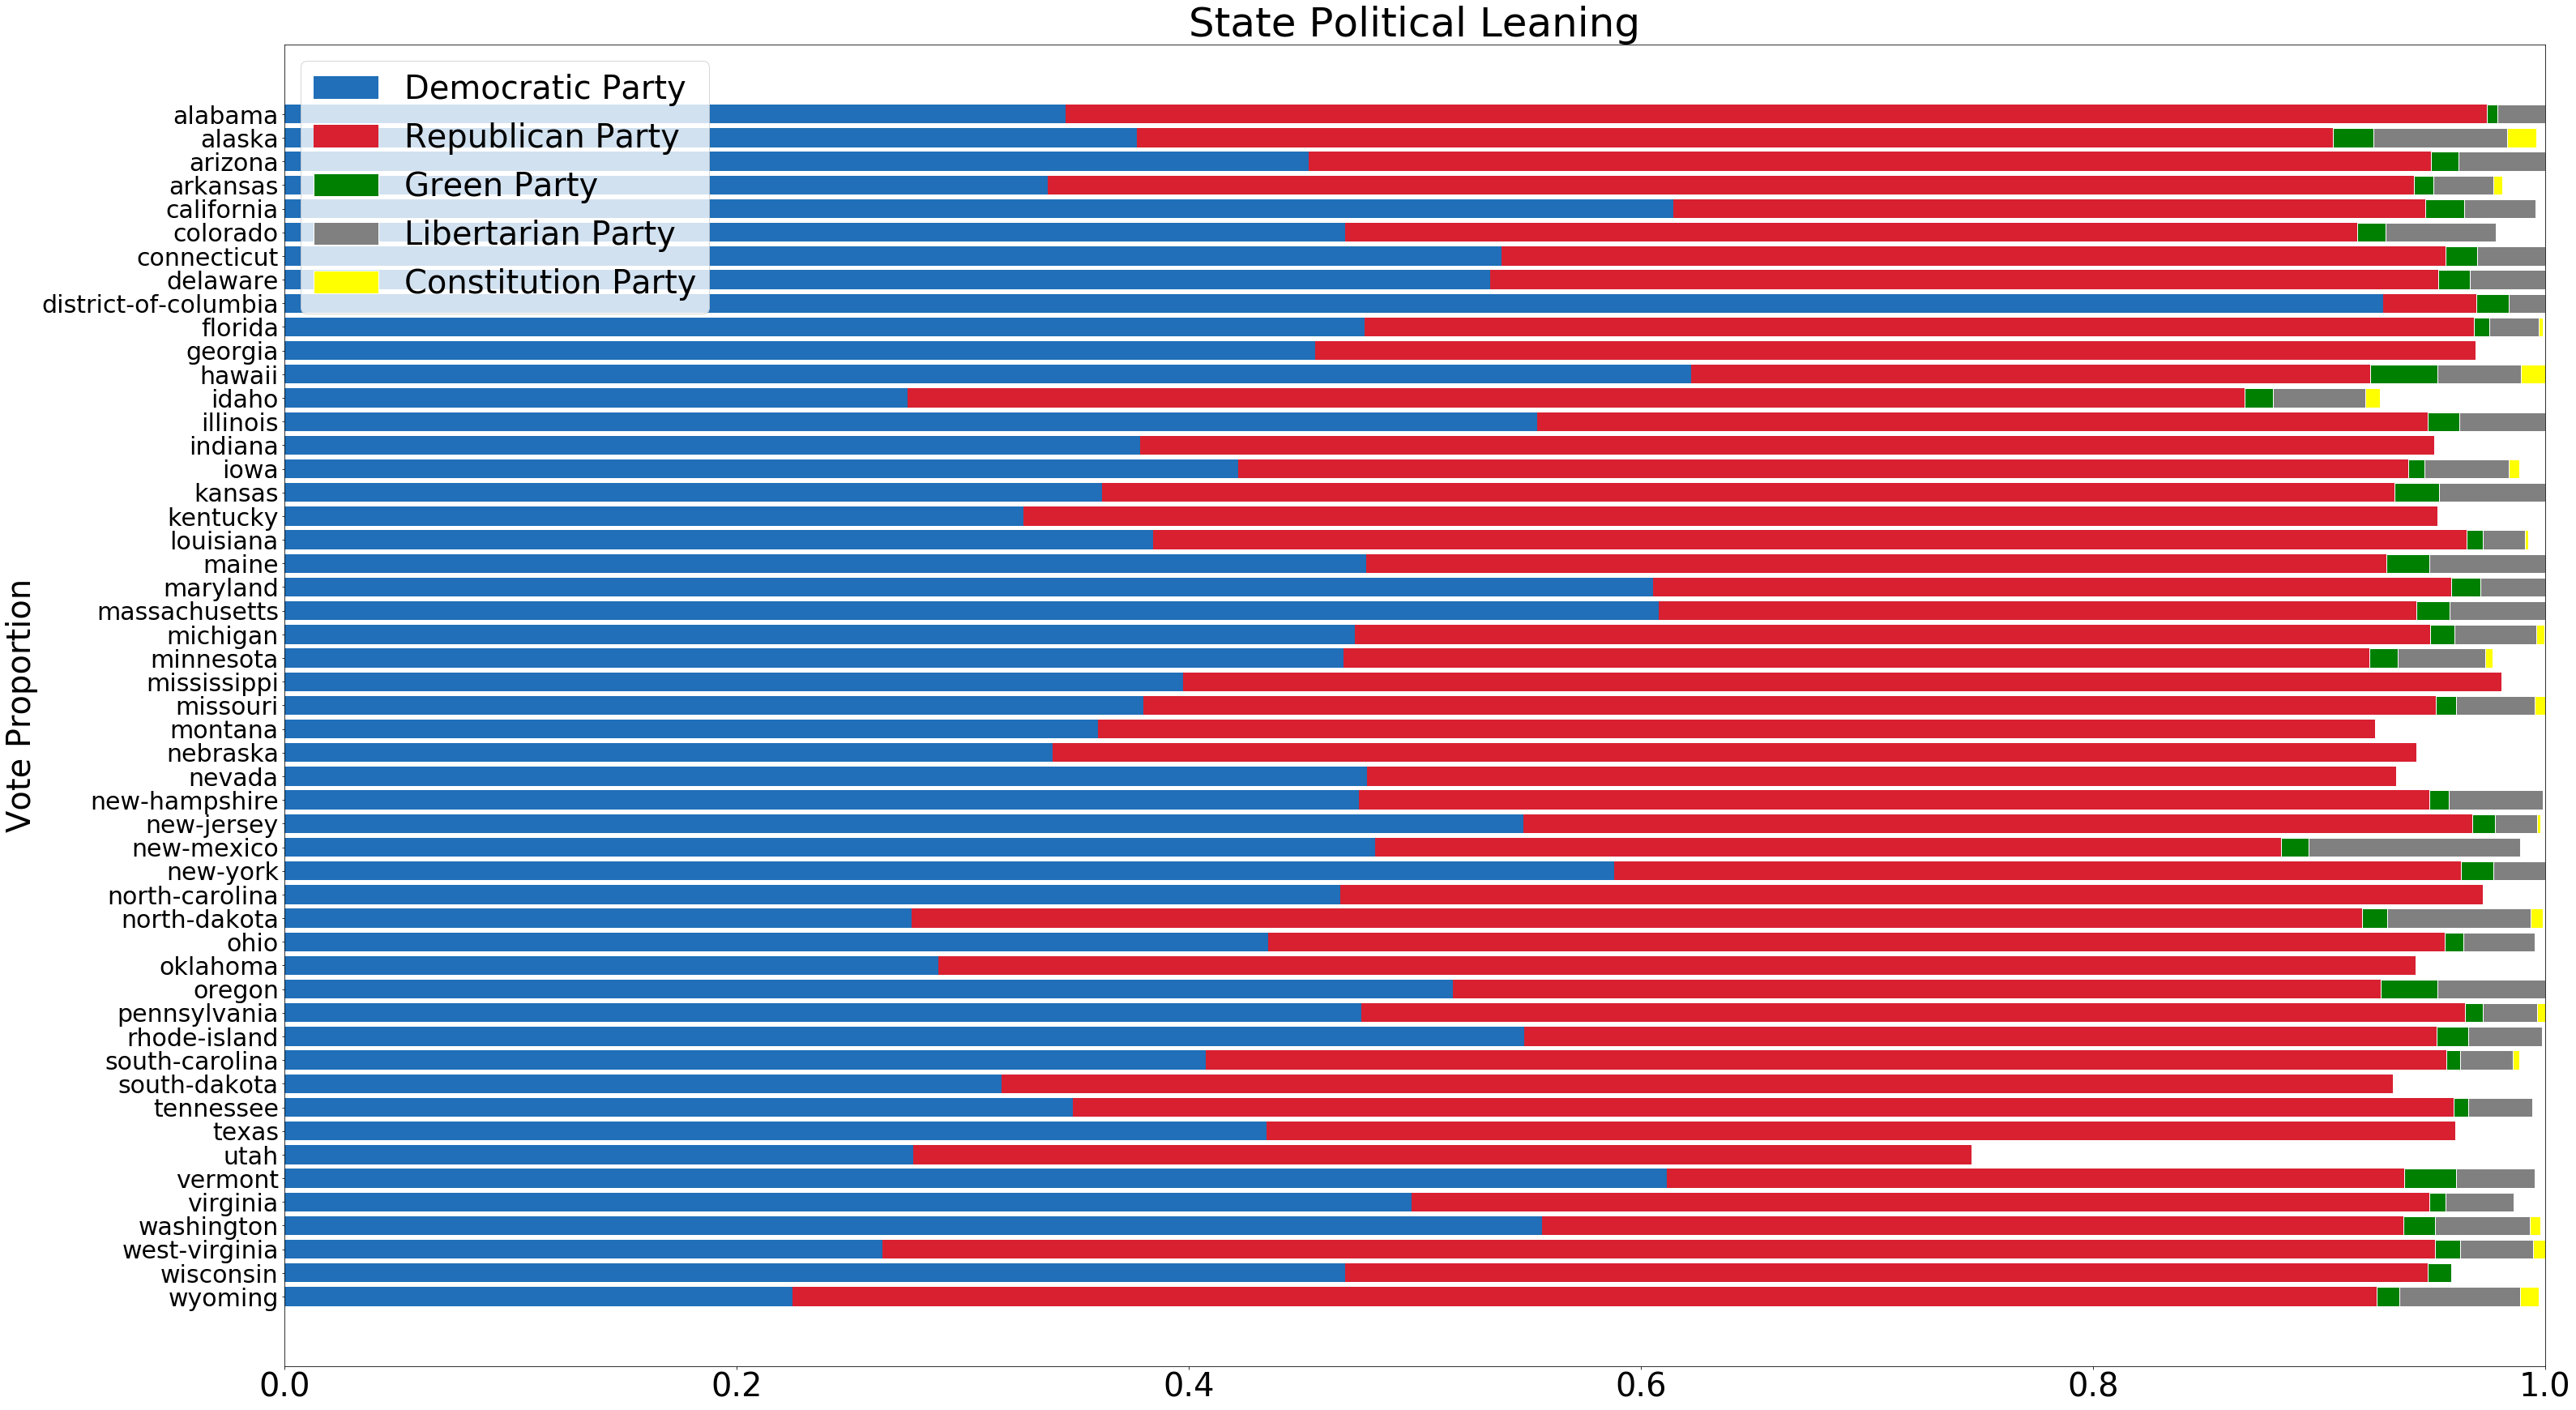

In [165]:
GOP = GOP_vals
DEM = DEM_vals
GRN = GRN_vals
LIB = LIB_vals
CST = CST_vals

labels = ["Democratic Party", "Republican Party", "Green Party", "Libertarian Party", "Constitution Party"]

colorscale = [
    'rgb(191, 28, 43)',
    'rgb(221, 134, 134)',
    'rgb(252, 244, 228)',
    'rgb(144, 178, 196)',
    'rgb(32, 111, 162)'
]

# Heights of bars1 + bars2
bars = np.add(GOP, DEM).tolist()
bars1 = np.add(bars, GRN).tolist()
bars2 = np.add(bars1, LIB).tolist()
 
# The position of the bars on the x-axis
r = list(range(51))
 
# Names of group and bar width
names = states
barWidth = .5

plt.figure(figsize=(50,30))

# Create GOP / RED 'rgb(32, 111, 162)'
plt.barh(r, DEM, color=(.125, .435, .72))

# Create DEM / BLUE
plt.barh(r, GOP, left=DEM, color=(.849, .124, .191))

# Create GRN / GREEN
plt.barh(r, GRN, left=bars, color='green', edgecolor='white')

# Create LIB / GRAY
plt.barh(r, LIB, left=bars1, color='gray', edgecolor='white')

# Create CST / GREEN
plt.barh(r, CST, left=bars2, color='yellow', edgecolor='white')
 
# Custom axis
plt.title("State Political Leaning", fontweight='regular', fontsize = 50)
plt.yticks(r, names, fontweight='regular', fontsize = 30)
plt.xticks(fontsize = 40)
plt.ylabel("Vote Proportion", fontsize = 40)
plt.legend(labels, prop={'size': 40})
plt.gca().invert_yaxis()
 
# Show graphic
plt.savefig("/Users/lindseytam/Desktop/DM_PROJ/www/politic.png")
plt.show()




This visualization shows the political leanings of each state based on the way each state voted overall while also into account the voting variations of each county. Initially, I wanted to simply look at the voting preference of each capital as an indicator of state preference because i believed that the capital would be a strong representation of the state. I quickly realized that was not the case with all states. For example, Califonia has strong Democratic leanings, yet its capital Sacremento had a majority vote for the Republican canidate. I will use this information to determine the strength (strong, neutral, weak) of each state's political leaning. Since GOP and DEM were the most popular political parties in all 50 states (and US territories), I will be focusing solely on those 2 parties. 

## Next Step:
Find a way to categorize strong, neutral, and weak political leanings of each state through z scores. 
Let's just focus on GOP and DEM


In [6]:
def find_mean(pp):
    total_pp = 0
    for i in range(len(pp)):
        total_pp += pp[i]
    return (total_pp / len(pp))

GOP_mean = find_mean(GOP_vals) #0.4902899958370037
DEM_mean = find_mean(DEM_vals) #0.4502687601264051

def find_sd(pp):
    total_sum = 0
    mean = find_mean(pp)
    for i in range(len(pp)):
        total_sum += (pp[i] - mean)**2
    return math.sqrt(total_sum / len(pp))
    
GOP_sd = find_sd(GOP_vals) #0.11711987817335431
DEM_sd = find_sd(DEM_vals) #0.12289399007489787

GOP_mean + GOP_sd / 2 #0.6288841357640034
DEM_mean + DEM_sd / 2 #0.3455375295031915

0.511715755163854

In [226]:
data = {"States": states}
pp_data = []
pp_color = []

for i in range(0,51):

    if GOP[i] - DEM[i] == 0:
        pp_data.append("Neutral")
        pp_color.append(3)
    elif GOP[i] - DEM[i] > 0: #GOP
        if GOP[i] < GOP_mean + GOP_sd / 2:
            pp_data.append("Weak GOP")
            pp_color.append(2)
        elif GOP[i] >= GOP_mean + GOP_sd / 2:
            pp_data.append("Strong GOP")
            pp_color.append(1)
    else:
        if DEM[i] < DEM_mean + DEM_sd / 2:
            pp_data.append("Weak DEM")
            pp_color.append(4)
        else:
            pp_data.append("Strong DEM")
            pp_color.append(5)

data["Z-score"] = pp_data
data["Color"] = pp_color
data["StateCodes"] = pp["StateCode"].unique()

df = pd.DataFrame(data)
df


States     Z-score  Color StateCodes
0                alabama  Strong GOP      1         AK
1                 alaska    Weak GOP      2         AL
2                arizona    Weak GOP      2         AR
3               arkansas  Strong GOP      1         AZ
4             california  Strong DEM      5         CA
5               colorado    Weak DEM      4         CO
6            connecticut  Strong DEM      5         CT
7               delaware  Strong DEM      5         DC
8   district-of-columbia  Strong DEM      5         DE
9                florida    Weak GOP      2         FL
10               georgia    Weak GOP      2         GA
11                hawaii  Strong DEM      5         HI
12                 idaho  Strong GOP      1         IA
13              illinois  Strong DEM      5         ID
14               indiana  Strong GOP      1         IL
15                  iowa    Weak GOP      2         IN
16                kansas  Strong GOP      1         KS
17              kentucky  Strong GOP      1         KY
18             louisiana  Strong GOP      1         LA
19                 maine    Weak DEM      4         MA
20              maryland  Strong DEM      5         MD
21         massachusetts  Strong DEM      5         ME
22              michigan    Weak GOP      2         MI
23             minnesota    Weak DEM      4         MN
24           mississippi  Strong GOP      1         MO
25              missouri  Strong GOP      1         MS
26               montana  Strong GOP      1         MT
27              nebraska  Strong GOP      1         NC
28                nevada    Weak DEM      4         ND
29         new-hampshire    Weak DEM      4         NE
30            new-jersey  Strong DEM      5         NH
31            new-mexico    Weak DEM      4         NJ
32              new-york  Strong DEM      5         NM
33        north-carolina    Weak GOP      2         NV
34          north-dakota  Strong GOP      1         NY
35                  ohio    Weak GOP      2         OH
36              oklahoma  Strong GOP      1         OK
37                oregon  Strong DEM      5         OR
38          pennsylvania    Weak GOP      2         PA
39          rhode-island  Strong DEM      5         RI
40        south-carolina    Weak GOP      2         SC
41          south-dakota  Strong GOP      1         SD
42             tennessee  Strong GOP      1         TN
43                 texas    Weak GOP      2         TX
44                  utah    Weak GOP      2         UT
45               vermont  Strong DEM      5         VA
46              virginia    Weak DEM      4         VT
47            washington  Strong DEM      5         WA
48         west-virginia  Strong GOP      1         WI
49             wisconsin    Weak GOP      2         WV
50               wyoming  Strong GOP      1         WY

In [219]:
colorscale = [
    'rgb(191, 28, 43)',
    'rgb(221, 134, 134)',
    'rgb(252, 244, 228)',
    'rgb(144, 178, 196)',
    'rgb(32, 111, 162)'
]


fig = go.Figure(data=go.Choropleth(
    locations=df['StateCodes'], # Spatial coordinates
    z = (df["Color"]).astype(int), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = colorscale,
    colorbar_title = "Political Strength",
))
plt.figure(figsize=(20,10))

fig.update_layout(
    title_text = 'Political Strength by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

#plt.savefig('usa_map.png')

<Figure size 1440x720 with 0 Axes>

# Useful Reference

https://www.nytimes.com/elections/2016/results/president

https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html

https://www.currentresults.com/Weather/US/average-annual-temperatures-large-cities.php

In [79]:
def clean_county_weather(data):
    # code is state code
    
    data = data.rename({'DATE': 'date'}, axis=1)
    data = data.dropna()
    data["TAVG"] = (data['TMAX'] + data['TMIN']) / 2
    data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")
    data = data.sort_values(by='date')
    #data = data.drop_duplicates(subset = "date")
    
    zscore_max = (data["TMAX"] - data["TMAX"].mean())/data["TMAX"].std()
    zscore_min = (data["TMIN"] - data["TMIN"].mean())/data["TMIN"].std()
    zscore_avg = (data["TAVG"] - data["TAVG"].mean())/data["TAVG"].std()

    data['zscore_max'] = zscore_max
    data['zscore_min'] = zscore_min
    data['zscore_avg'] = zscore_avg
    return data

def clean_state_weather(data):
    # code is state code
    
    data = data.rename({'DATE': 'date'}, axis=1)
    data = data.dropna()
    data["TAVG"] = (data['TMAX'] + data['TMIN']) / 2
    data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")
    data = data.sort_values(by='date')
    data = data.drop_duplicates(subset = "date")
    
    
    zscore_max = (data["TMAX"] - data["TMAX"].mean())/data["TMAX"].std()
    zscore_min = (data["TMIN"] - data["TMIN"].mean())/data["TMIN"].std()
    zscore_avg = (data["TAVG"] - data["TAVG"].mean())/data["TAVG"].std()

    data['zscore_max'] = zscore_max
    data['zscore_min'] = zscore_min
    data['zscore_avg'] = zscore_avg
    return data

def clean_tweets(data):
    data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")
    data = data.dropna()
    return data

def plot_county_weather(weather_data, state_code): 
    plt.figure(figsize=(20, 10))
    plt.title(state_code + ' weather trends')
    plt.plot(weather_data["date"],weather_data["TMIN"])
    plt.plot(weather_data["date"],weather_data["TMAX"])
    #plt.plot(weather_data["date"],weather_data["total_count"])
    #plt.plot(tweet_data["date"],tweet_data["n_tweets"])
    plt.xticks(rotation=45)
    plt.xlabel('Time')
    plt.ylabel('Temperature (F)')
    plt.show()

def get_season(data):
    winter = [11, 12, 1]
    spring = [2, 3, 4]
    summer = [5, 6, 7]
    fall = [8, 9, 10]
    season = []
    for i in range(len(data)):
        month = data['date'][i].month
        if month in winter:
            season.append("winter")
        elif month in spring:
            season.append("spring")
        elif month in summer:
            season.append("summer")  
        else:
            season.append("fall")  
    data['Season'] = season
    return data

def create_scatterplot(data, location, season):
    plt.figure(figsize=(20, 10))
    plt.scatter(data["total_norm_by_hour"], data["zscore_max"], alpha=0.2, color='blue')
    plt.title(season + ' trends in Temperature v. Tweets per hour', fontsize=40)
    plt.xlabel('Tweets per hour', fontsize=40)
    plt.ylabel('Temperature(F) z-score', fontsize=40)
    plt.tick_params(labelsize = 30)
    plt.savefig("/Users/lindseytam/Desktop/climate_bias/Shiny_version/www/"+location+"_"+season+"_dailymax.png", transparent=True)
    plt.savefig("/Users/lindseytam/Desktop/climate_bias/HTML_version/img/"+location+"_"+season+"_dailymax.png", transparent=True)
    plt.show()
    plt.figure(figsize=(20, 10))
    plt.scatter(data["total_norm_by_hour"], data["zscore_min"], alpha=0.2, color='blue')
    plt.title(season + ' trends in Temperature v. Tweets per hour', fontsize=40)
    plt.xlabel('Tweets per hour', fontsize=40)
    plt.ylabel('Temperature(F) z-score', fontsize=40)
    plt.tick_params(labelsize = 40)
    #plt.savefig("/Users/lindseytam/Desktop/climate_bias/Shiny_version/www/"+location+"_"+season+"_dailymin.png", transparent=True)
    #plt.savefig("/Users/lindseytam/Desktop/climate_bias/HTML_version/img/"+location+"_"+season+"_dailymin.png", transparent=True)
    plt.show()
    
def best_fit_slope_and_intercept(xdata,ydata):
    m = (((mean(xdata)*mean(xdata)) - mean(xdata*ydata)) /
         ((mean(xdata)*mean(xdata)) - mean(xdata*ydata)))
    
    b = mean(ydata) - m*mean(xdata)
    
    return m, b
    
def graph_temp_tweet(data, location):    
    fig, ax1 = plt.subplots(figsize=(40,10)) #120,20

    color = 'tab:red'
    ax1.set_title('Weather v. Tweets per hour', fontsize=40)
    ax1.set_ylabel('Temperature (F)', color=color, fontsize=40)
    ax1.plot(data["date"], data["TMAX"], label='Daily temp max', color='tab:red')
    ax1.plot(data["date"], data["TMIN"], label='Daily temp min', color='maroon')
    ax1.legend(fontsize=30)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=30)
    ax1.tick_params(axis='x', labelcolor='black', labelsize=30)
    
    ax2 = ax1.twinx() 

    color = 'tab:blue'
    ax2.set_ylabel('Tweets per hour', color=color, fontsize=30) 
    ax2.plot(data["date"], data["total_norm_by_hour"], color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=30)
    fig.savefig("/Users/lindseytam/Desktop/climate_bias/Shiny_version/www/"+location+".png", transparent=True)
    fig.savefig("/Users/lindseytam/Desktop/climate_bias/HTML_version/img/"+location+".png", transparent=True)
    plt.show()
    
    
words = ["climate change", "global warming", "warming", "climate", "carbon dioxide", "co2", "pollution"
         "air quality", "climate crisis", "climatedenial", "climateemergency", "climate denial",
         "climateaction", "climate science", "drought", "water level"]

def bar_wordfreq(data, location): # location as in city or state

    freq = []
   
    for word in words:
        freq.append(data[word].sum())

    y_pos = np.arange(len(words))

    data = {'Words': words, 'Freq': freq}
    df = pd.DataFrame(data).sort_values(by=['Freq'])

    plt.figure(figsize=(20,10))
    plt.barh(y_pos, df["Freq"], align='center', alpha=0.5, color='blue')
    plt.xticks(fontsize = 20)
    plt.yticks(y_pos, df["Words"], fontsize = 30)
    plt.ylabel('Words', fontsize = 40)
    plt.xlabel('Frequency', fontsize = 40)
    plt.title('Word Frequency', fontsize = 50)
    plt.savefig("/Users/lindseytam/Desktop/climate_bias/HTML_version/img/"+location+"_wordfreq.png", transparent=True,  bbox_inches='tight')
    plt.savefig("/Users/lindseytam/Desktop/climate_bias/Shiny_version/www/"+location+"_wordfreq.png", transparent=True,  bbox_inches='tight')
    plt.show()
    
  
    
    

def check_weather(state):
    weather = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/weather/"+state+"_weather.csv") 
    weather = clean_county_weather(weather)
    plot_county_weather(weather, state)
    
def find_city(state):
    weather = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/weather/"+state+"_weather.csv")
    cities = weather["NAME"].unique()
    weather = clean_county_weather(weather)
    instances = []
    for city in cities:
        instances.append(len(weather[weather["NAME"] == city]))
    data = {'City':cities, 'Size': instances} 
    df = pd.DataFrame(data) 
    df = df.sort_values(by=['Size'])
    return df


In [73]:
def main_state(state_name): #state is a string for the state code
    
    weather = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/weather/"+state_name+"_weather.csv")
    weather = clean_state_weather(weather)
    tweets = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/tweets/"+state_name+"/"+state_name+"_tweet_temp_data.csv")
    tweets = clean_tweets(tweets)
    
    state = pd.merge(tweets, weather, how='inner', on=['date'])

    seasonal = get_season(state)
    winter = seasonal[seasonal['Season'] == "winter"]
    spring = seasonal[seasonal['Season'] == "spring"]
    summer = seasonal[seasonal['Season'] == "summer"]
    fall = seasonal[seasonal['Season'] == "fall"]
        
    season = [seasonal, winter, spring, summer, fall]
    label = ["Overall", "Winter", "Spring","Summer","Fall"]
    for i in range(len(season)):
        create_scatterplot(season[i], state_name, label[i])

    #graph_temp_tweet(state, state_name)
    #bar_wordfreq(tweets, state_name)
    
 
                 
def main_city(state, city_name, location): 
    #state is a string for the state code
    #city is the name of the city
    #location is the name of the weather station closest to city
    
    weather = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/weather/"+state+"_weather.csv")
    weather = weather[weather["NAME"] == location]
    weather = clean_county_weather(weather)
    tweets = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/tweets/"+state+"/"+city_name+"_tweet_temp_data.csv")
    tweets = clean_tweets(tweets)
    
    city = pd.merge(tweets, weather, how='inner', on=['date'])
    
    seasonal = get_season(city)
    winter = seasonal[seasonal['Season'] == "winter"]
    spring = seasonal[seasonal['Season'] == "spring"]
    summer = seasonal[seasonal['Season'] == "summer"]
    fall = seasonal[seasonal['Season'] == "fall"]
    season = [seasonal, winter, spring, summer, fall]
    label = ["Overall", "Winter", "Spring","Summer","Fall"]
    for i in range(len(season)):
        m, b = best_fit_slope_and_intercept(season[i]["total_norm_by_hour"], season[i]["zscore_max"].abs())
        xs = season[i]["total_norm_by_hour"]
        regression_line = [(m*x)+b for x in xs]
        regression_line = []
        for value in season[i]["total_norm_by_hour"]:
            regression_line.append((m*value)+b)
        create_scatterplot(season[i], city_name, label[i], regression_line)
        
    graph_temp_tweet(city, city_name)
    bar_wordfreq(tweets, city_name)
    return 


# Alaska

In [6]:
states = ["CA","NC","TX","AK","ME","MA","AL","AZ","AR",
        "CO",
        "CT",
        "DE",
        "FL",
        "GA",
        "HI",
        "ID",
        "IL",
        'IN',
        "IA",
        "KS",
        "KY",
        "LA",
        "MD",
        "MI",
        "MN",
        "MS",
        "MO",
        "MT",
        "NE",
        "NV",
        "NH",
        "NJ",
        "NM",
        "NY",
        "ND",
        "OH",
        "OK",
        "OR","PA","RI","SC","SD","TN","UT","VT","VA","WA","WV", "WI","WY"
    ]

In [77]:
def main_city(state, city_name, location): 
    #state is a string for the state code
    #city is the name of the city
    #location is the name of the weather station closest to city
    
    weather = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/weather/"+state+"_weather.csv")
    weather = weather[weather["NAME"] == location]
    weather = clean_county_weather(weather)
    tweets = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/tweets/"+state+"/"+city_name+"_tweet_temp_data.csv")
    tweets = clean_tweets(tweets)
    
    city = pd.merge(tweets, weather, how='inner', on=['date'])
    return city

graph = []
def wordfreq(input_data, state): # location as in city or state

    freq = []
    for word in words:
        freq.append(round((input_data[word+"_norm_by_hour"].sum())/len(input_data),2))

    y_pos = np.arange(len(words))

    #data = {state: freq}
    #df1 = pd.DataFrame(freq)
    graph.append(freq)
    #output_data = pd.concat([output_data, df1], axis=1)
    #dfToList = df['Freq'].tolist()

    return 


for state in states:
    data = pd.read_csv(r"/Users/lindseytam/Desktop/climate_bias/data/states/"+state+"_tweet_temp_data.csv")
    df = wordfreq(data, state)
Index = words
Cols = states
df = pd.DataFrame(graph, index=Cols, columns=Index).T
df

CA    NC    TX    AK    ME    MA    AL    AZ    AR  \
climate change        1.00  0.12  0.48  0.02  0.02  0.21  0.04  0.15  0.02   
global warming        0.40  0.06  0.24  0.01  0.01  0.06  0.02  0.07  0.01   
warming               1.09  0.18  0.70  0.02  0.02  0.19  0.07  0.16  0.03   
climate               2.85  0.30  1.02  0.04  0.06  0.58  0.09  0.39  0.05   
carbon dioxide        0.02  0.00  0.01  0.00  0.00  0.00  0.00  0.00  0.00   
co2                   0.88  0.14  0.76  0.01  0.01  0.12  0.07  0.12  0.02   
pollutionair quality  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climate crisis        0.04  0.01  0.01  0.00  0.00  0.01  0.00  0.01  0.00   
climatedenial         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climateemergency      0.02  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climate denial        0.01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climateaction         0.07  0.01  0.01  0.00  0.00  0.01  0.00  0.00  0.00   
climate science       0.02  0.00  0.01  0.00  0.00  0.00  0.00  0.00  0.00   
drought               0.29  0.06  0.20  0.00  0.00  0.04  0.03  0.04  0.01   
water level           0.01  0.00  0.01  0.00  0.00  0.00  0.00  0.00  0.00   

                        CO  ...     SC    SD    TN    UT    VT    VA    WA  \
climate change        0.12  ...   0.04  0.01  0.08  0.04  0.01  0.15  0.18   
global warming        0.05  ...   0.03  0.00  0.05  0.02  0.00  0.06  0.05   
warming               0.13  ...   0.07  0.01  0.14  0.05  0.01  0.17  0.16   
climate               0.34  ...   0.10  0.02  0.18  0.13  0.04  0.39  0.50   
carbon dioxide        0.00  ...   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
co2                   0.12  ...   0.05  0.01  0.09  0.04  0.00  0.14  0.12   
pollutionair quality  0.00  ...   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climate crisis        0.01  ...   0.00  0.00  0.00  0.00  0.00  0.01  0.01   
climatedenial         0.00  ...   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climateemergency      0.00  ...   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climate denial        0.00  ...   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
climateaction         0.00  ...   0.00  0.00  0.00  0.00  0.00  0.01  0.01   
climate science       0.00  ...   0.00  0.00  0.00  0.00  0.00  0.00  0.00   
drought               0.03  ...   0.02  0.00  0.04  0.01  0.00  0.05  0.03   
water level           0.00  ...   0.00  0.00  0.00  0.00  0.00  0.00  0.00   

                        WV    WI    WY  
climate change        0.02  0.05  0.01  
global warming        0.01  0.03  0.00  
warming               0.02  0.08  0.00  
climate               0.04  0.11  0.01  
carbon dioxide        0.00  0.00  0.00  
co2                   0.01  0.04  0.00  
pollutionair quality  0.00  0.00  0.00  
climate crisis        0.00  0.00  0.00  
climatedenial         0.00  0.00  0.00  
climateemergency      0.00  0.00  0.00  
climate denial        0.00  0.00  0.00  
climateaction         0.00  0.00  0.00  
climate science       0.00  0.00  0.00  
drought               0.00  0.02  0.00  
water level           0.00  0.00  0.00  

[15 rows x 50 columns]

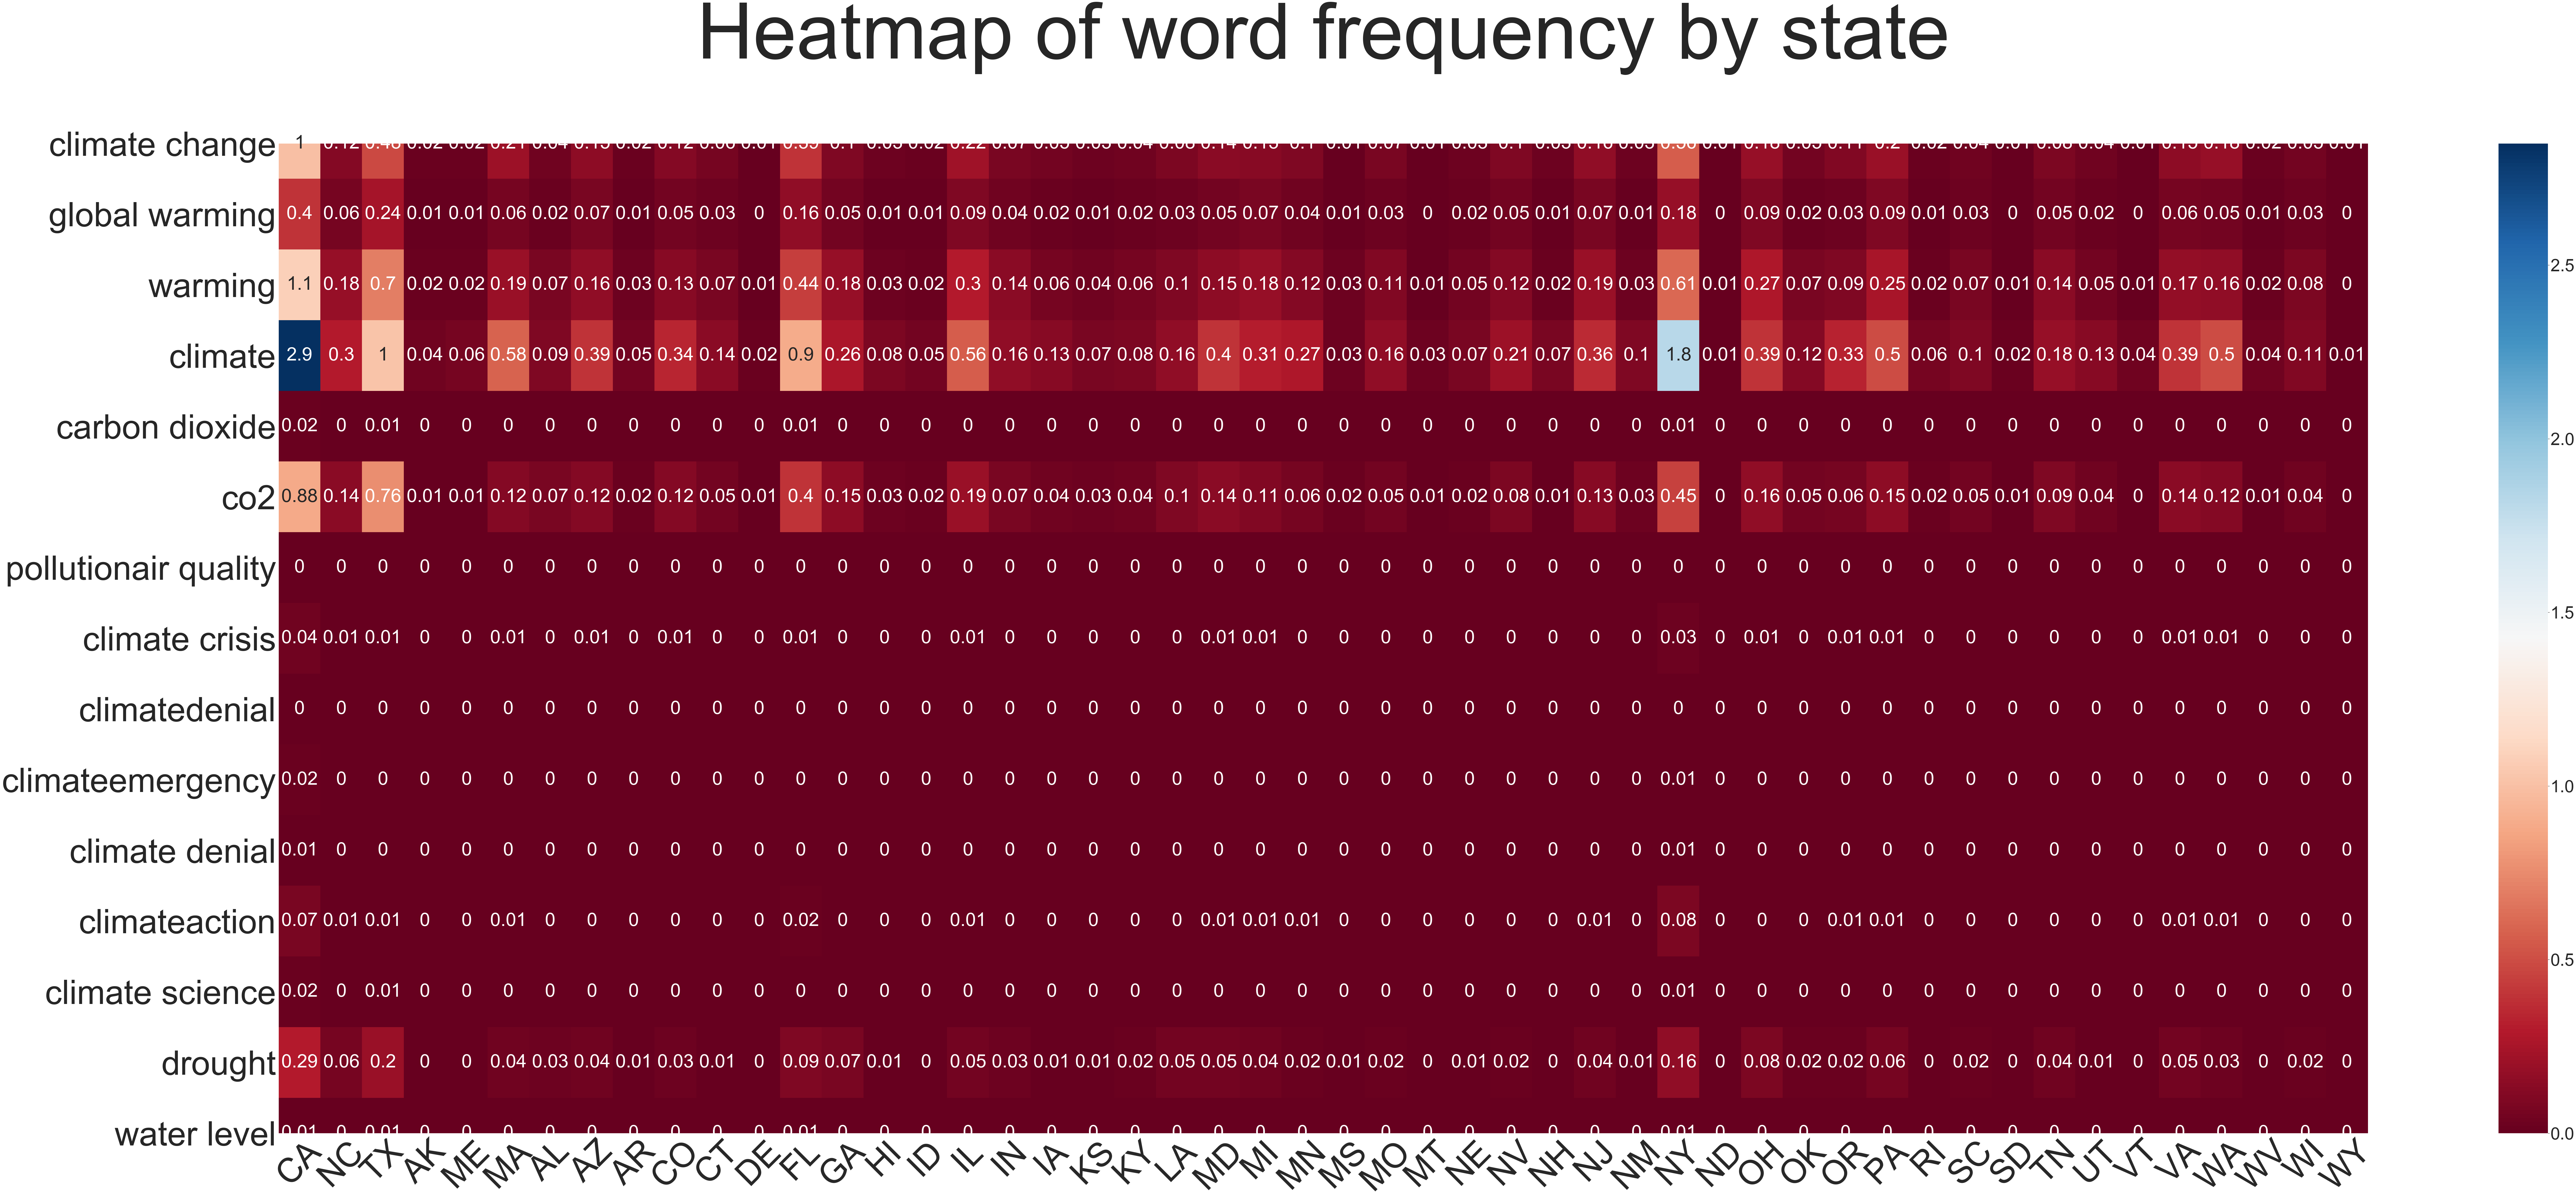

In [57]:
Index= words 
Cols = states #states
df1 = df
sns.set(font_scale=6)

fig, ax = plt.subplots(figsize=(180,70)) 

sns.heatmap(df1, annot=True, cmap='RdBu')
ax.set_title('Heatmap of word frequency by state'  + "\n", fontsize = 300)
ax.set_xticklabels(states, fontsize = 130, rotation=45)
ax.set_yticklabels(words, fontsize = 130)
plt.savefig("/Users/lindseytam/Desktop/climate_bias/HTML_version/img/heatmap.png")
plt.show()

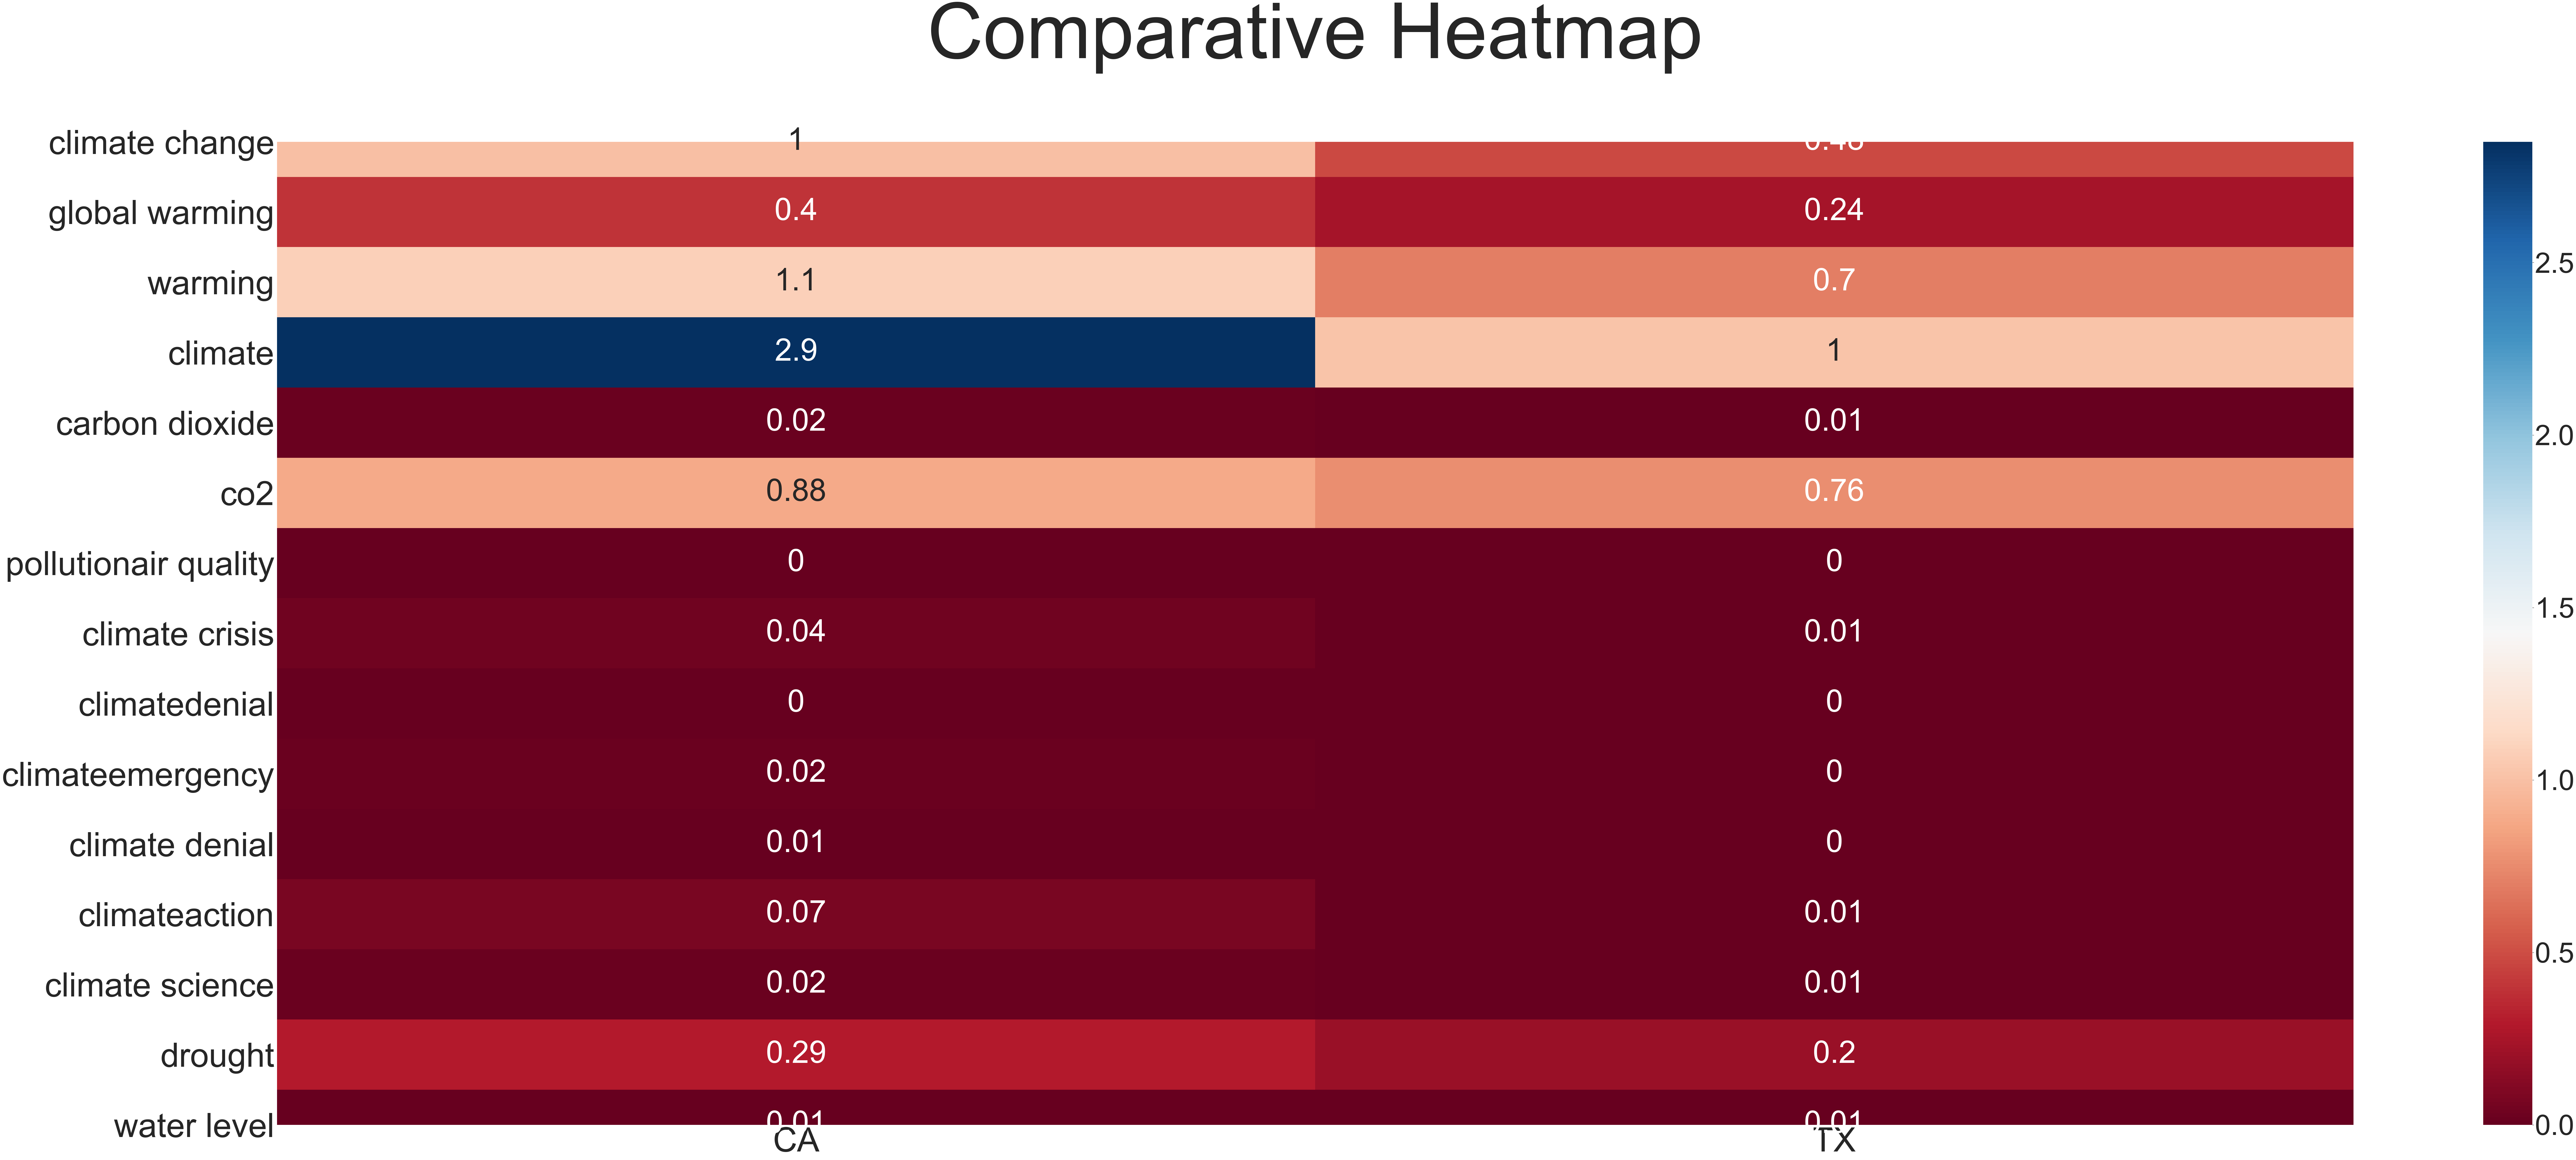

In [62]:
Index= words 
Cols = ["CA", "TX"] #states
df1 = compare = df[["CA", "TX"]]
sns.set(font_scale=10)

fig, ax = plt.subplots(figsize=(180,70)) 

sns.heatmap(df1, annot=True, cmap='RdBu')
ax.set_title('Comparative Heatmap' + "\n", fontsize = 300)
ax.set_xticklabels(Cols, fontsize = 130)
ax.set_yticklabels(words, fontsize = 130)
plt.savefig("/Users/lindseytam/Desktop/climate_bias/HTML_version/img/compare_heatmap.png")
plt.show()

In [56]:
cities = ["Juneau", "Fairbanks", "Kodiak"]
location = ["JUNEAU LENA POINT, AK US", "FAIRBANKS 11 NE, AK US", "KODIAK AIRPORT, AK US"]

for i in range(len(cities)):
    main_city("AK", cities[i], location[i])

# California

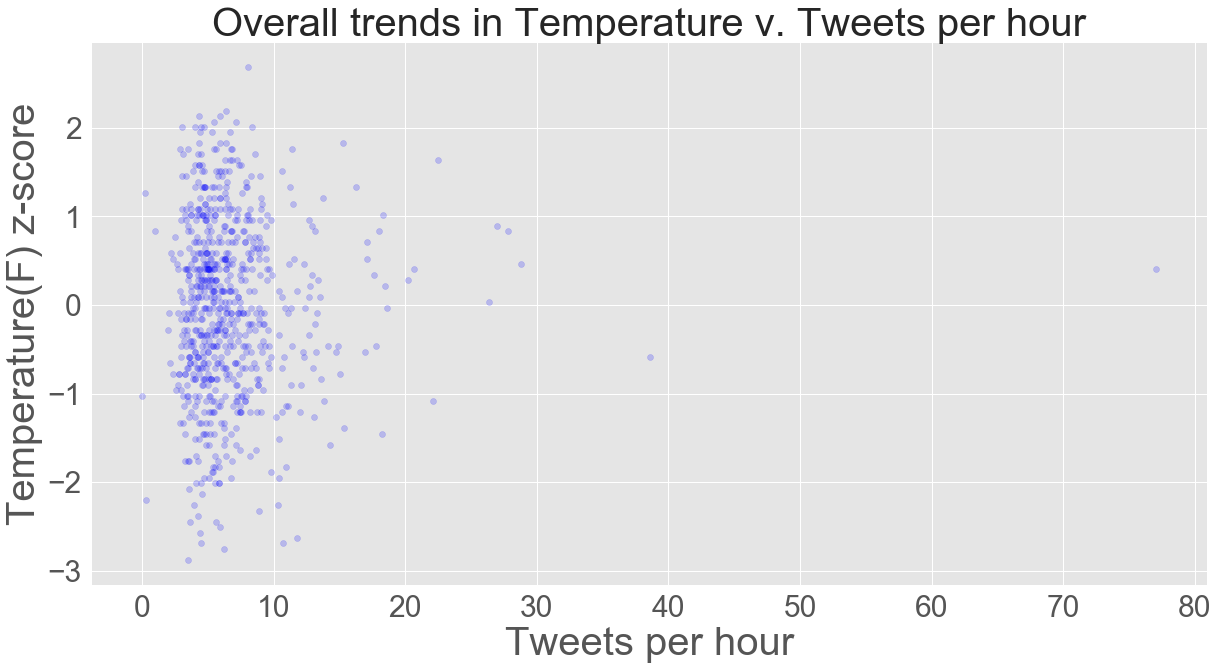

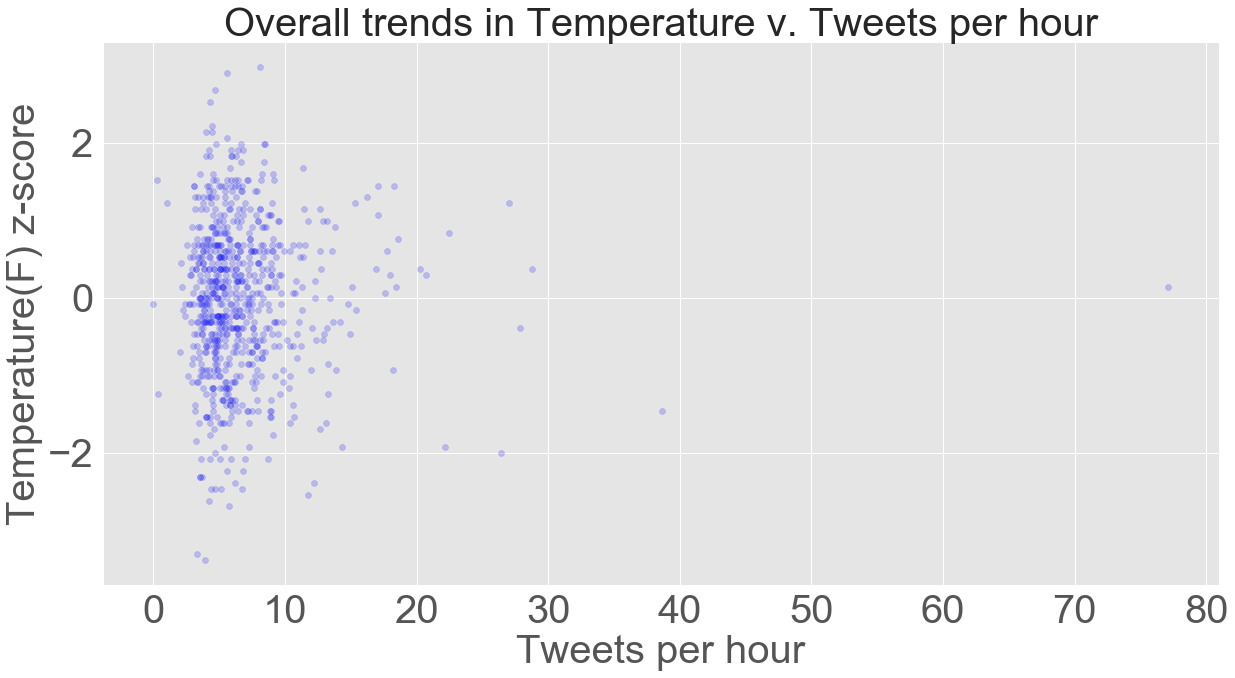

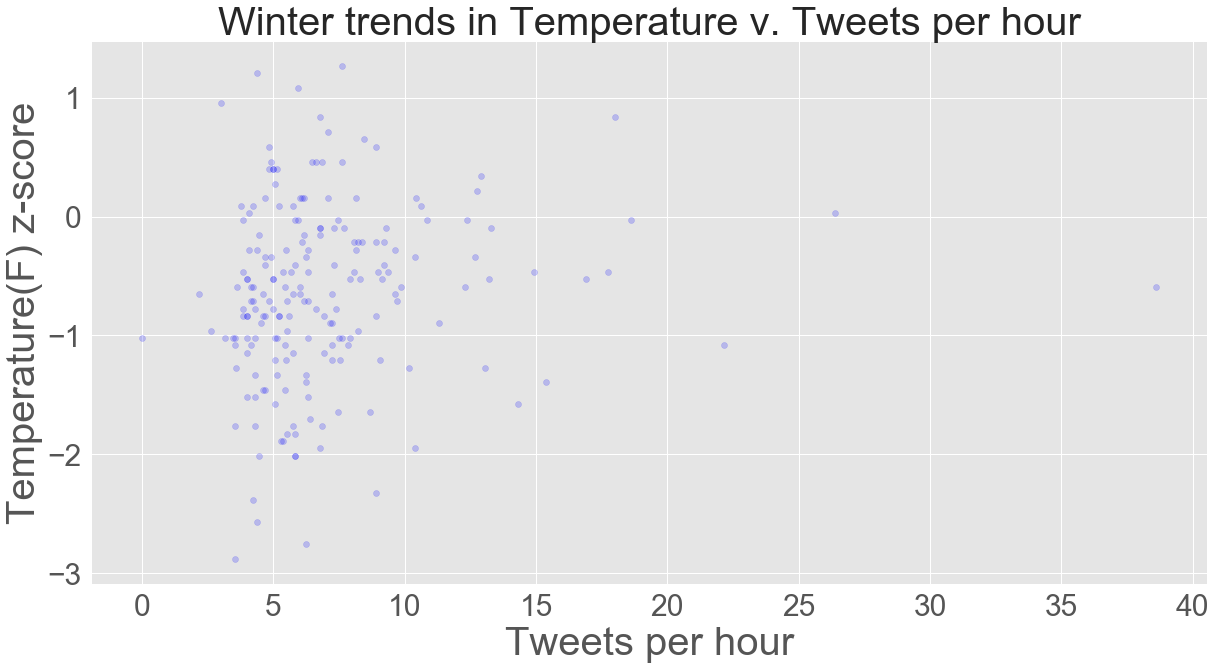

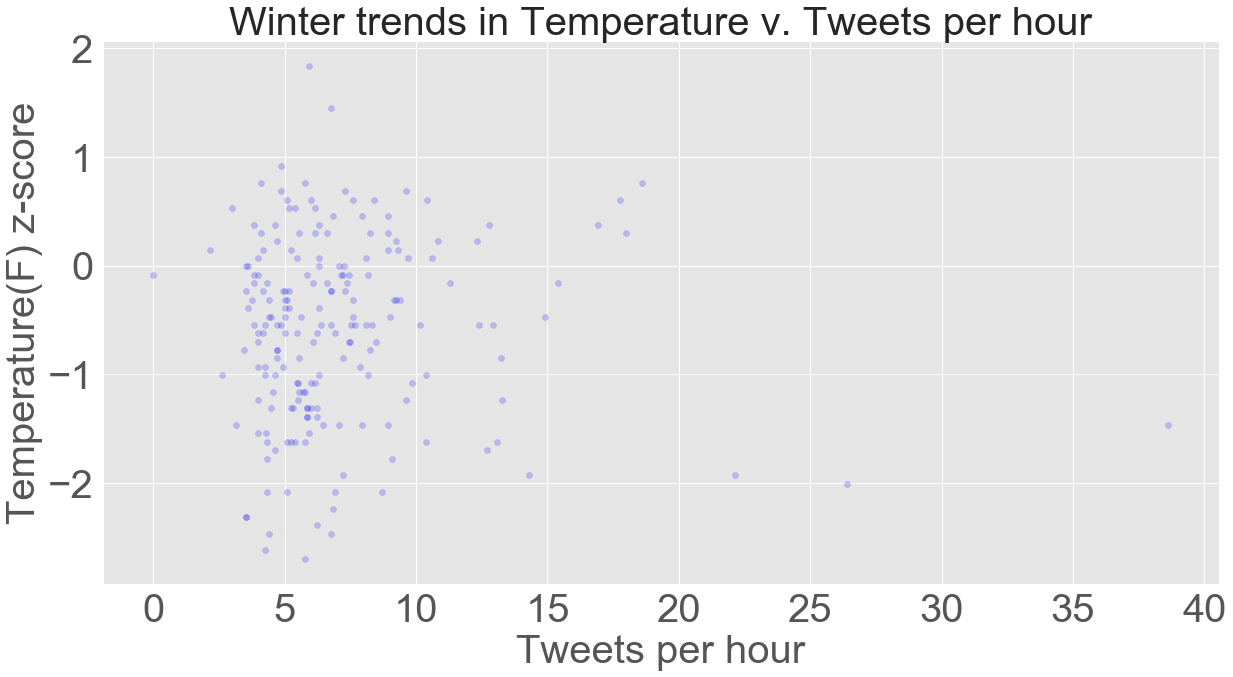

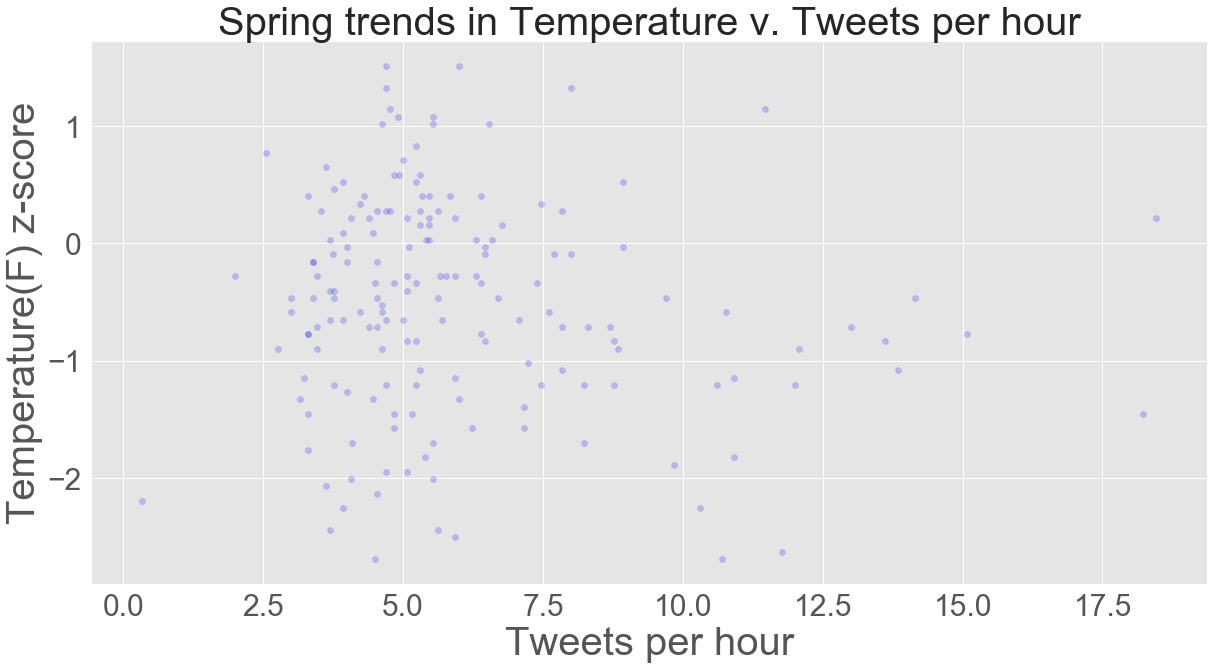

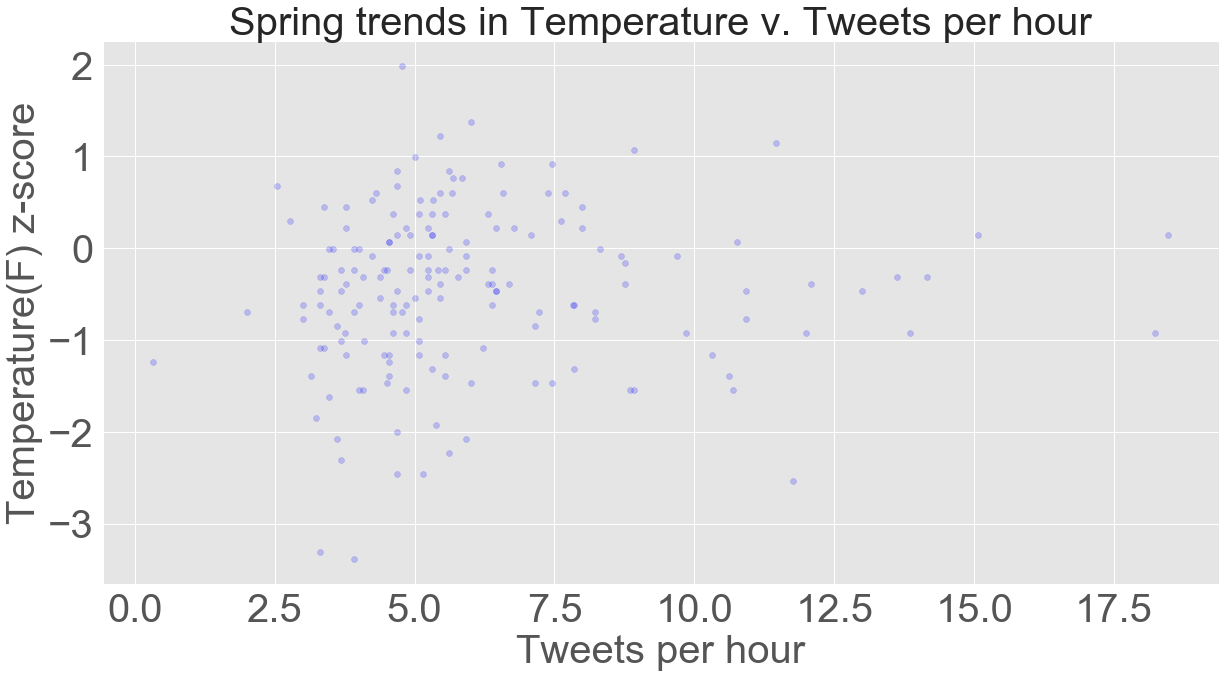

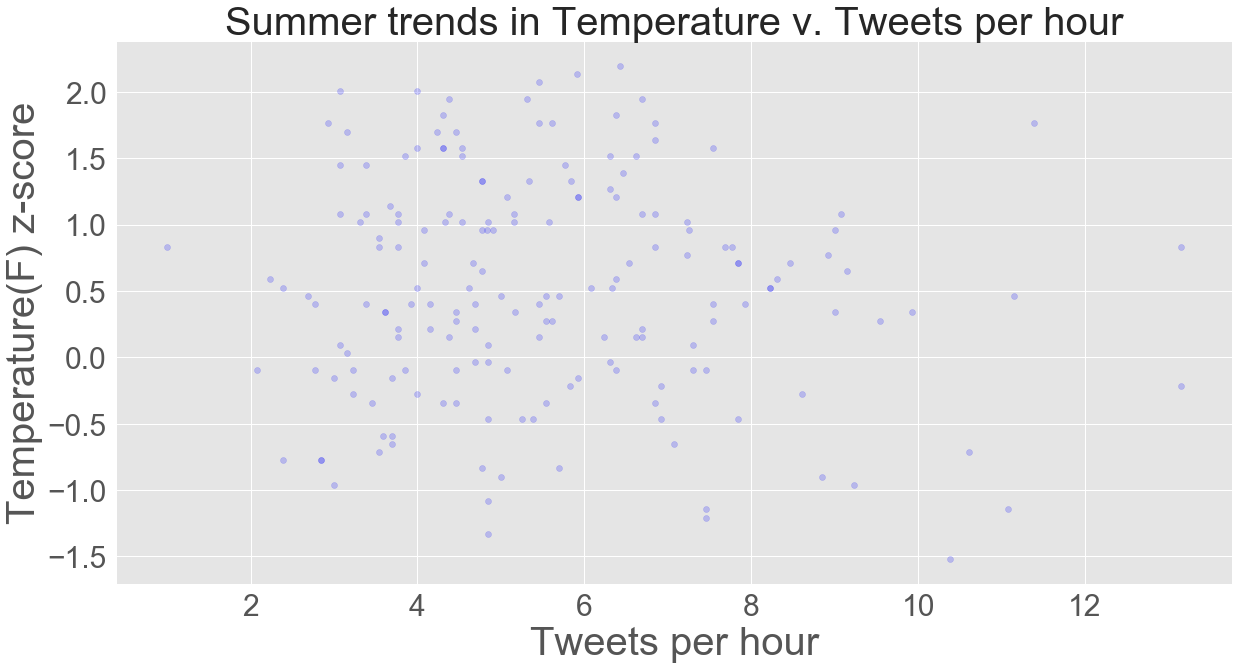

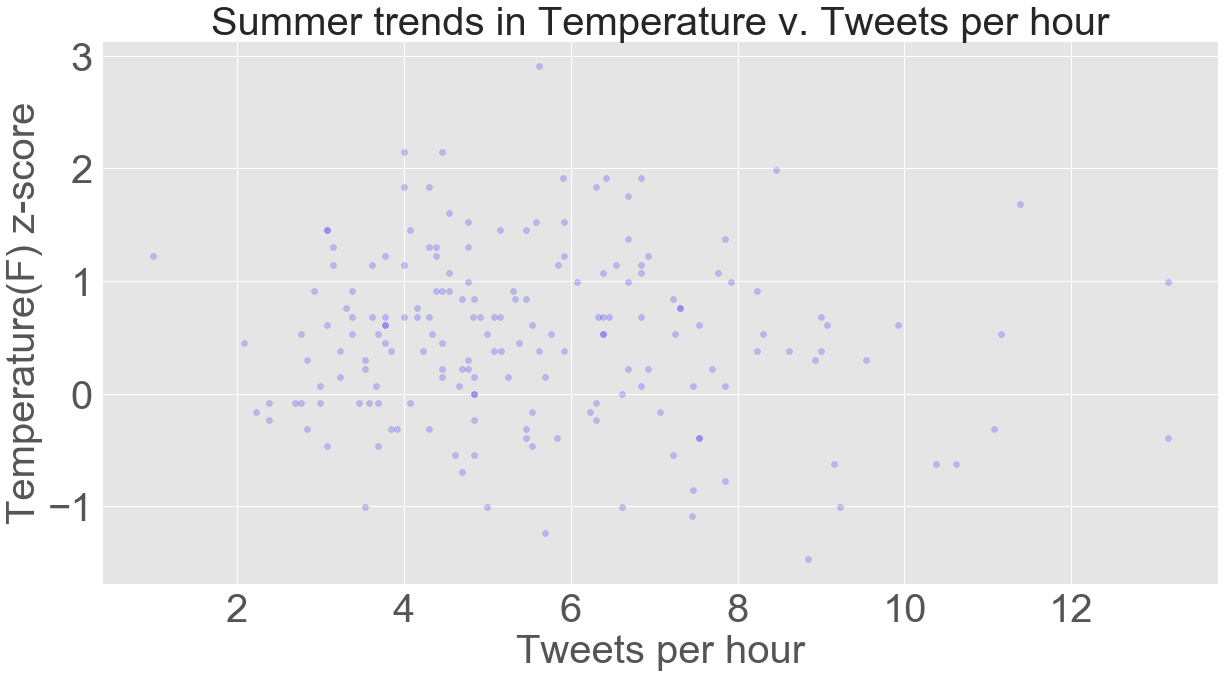

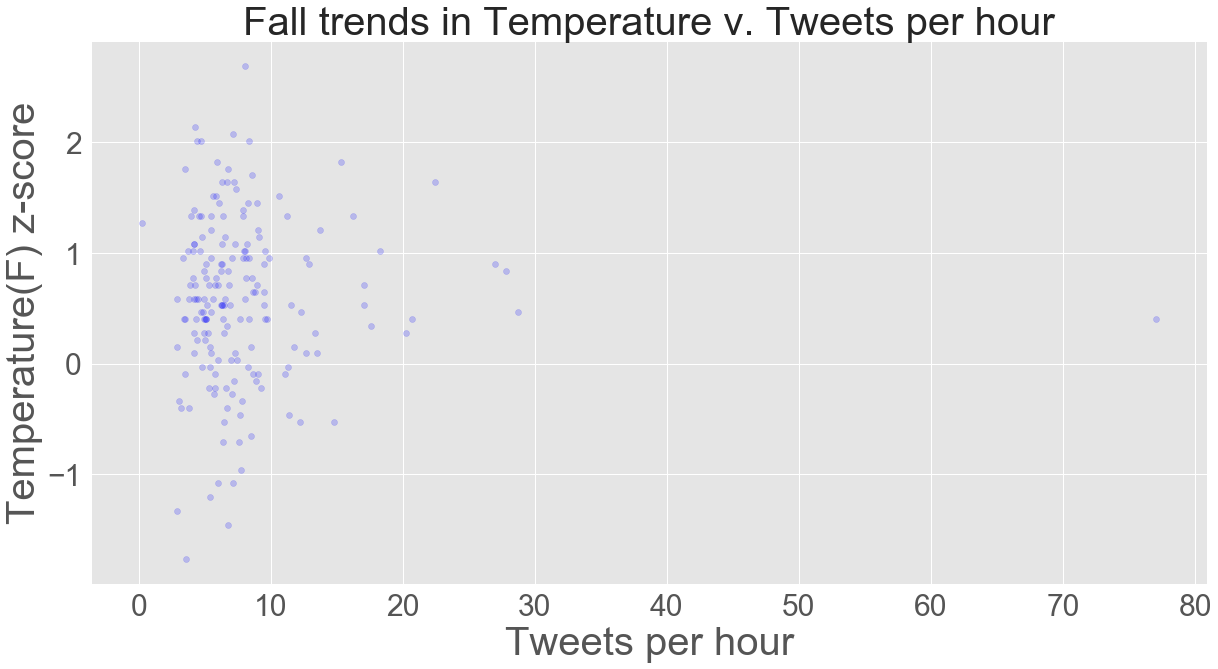

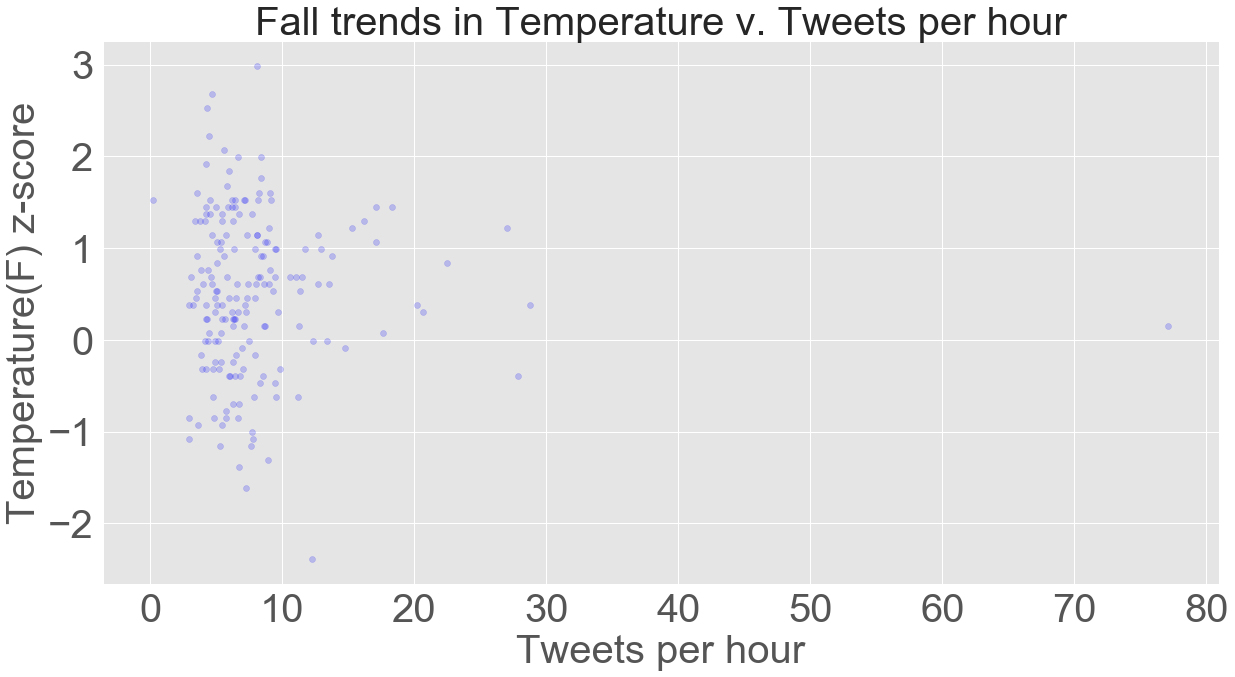

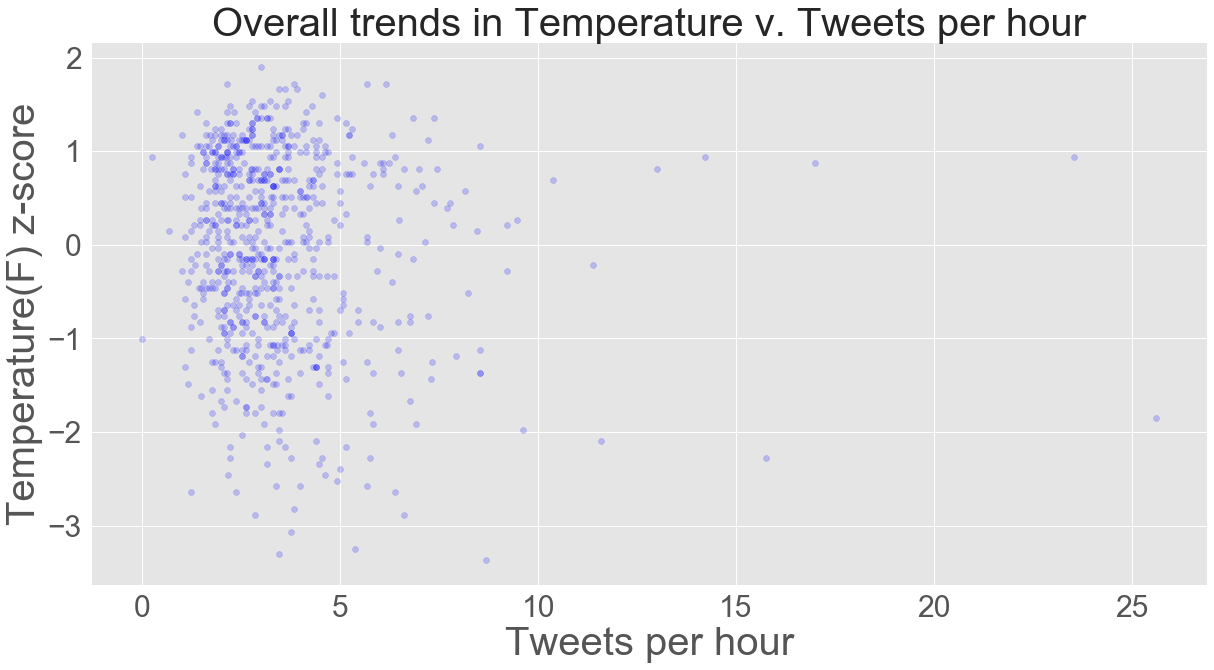

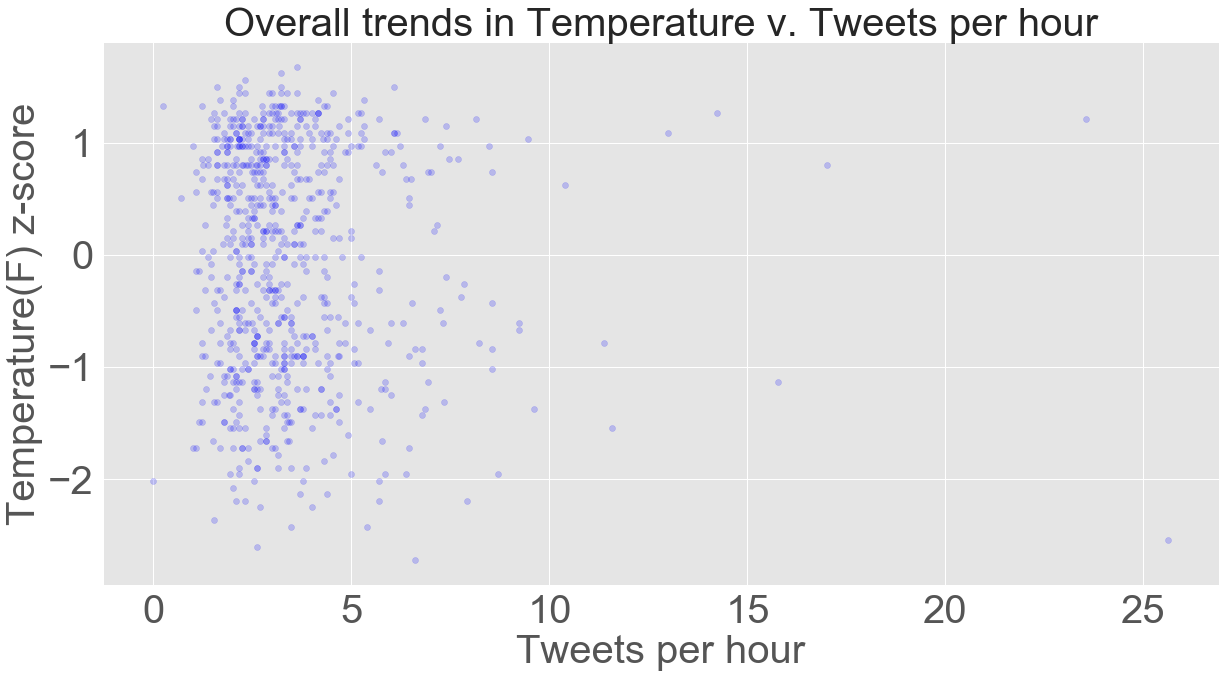

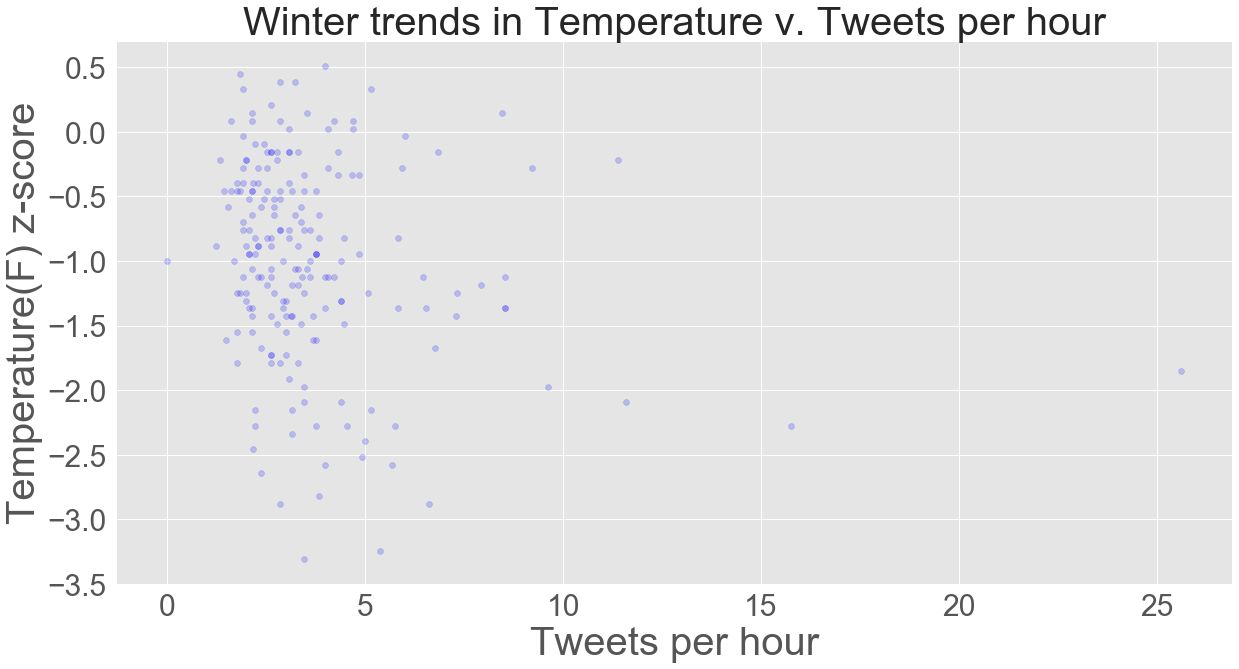

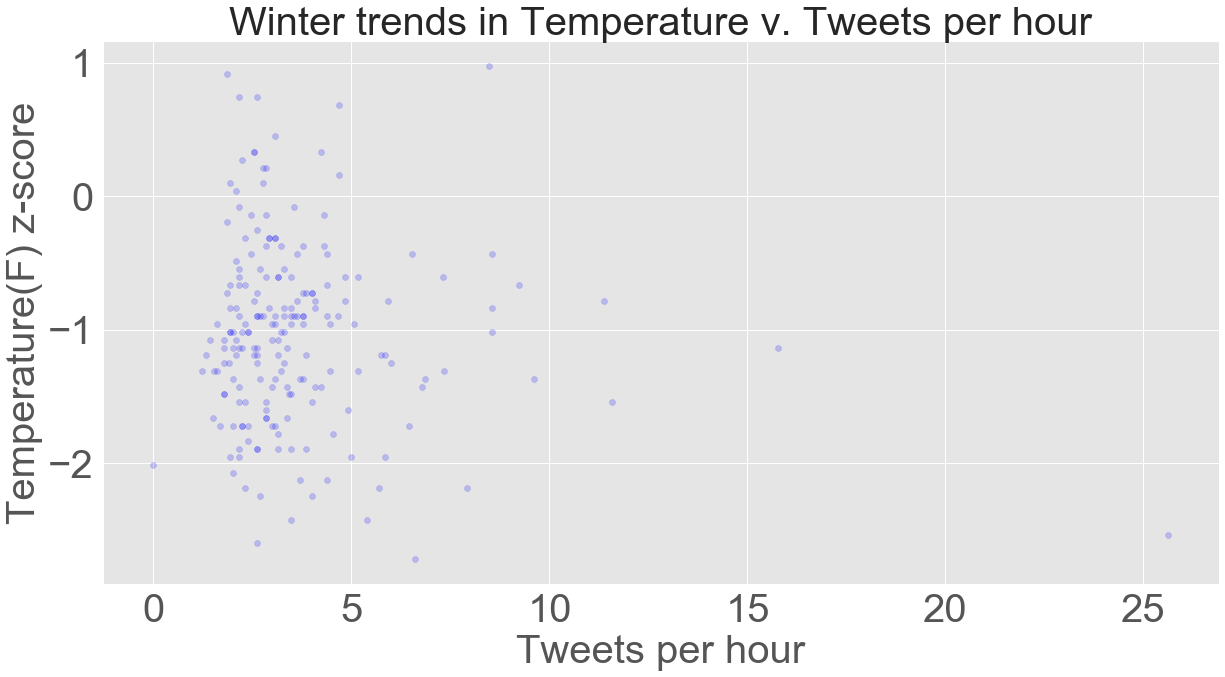

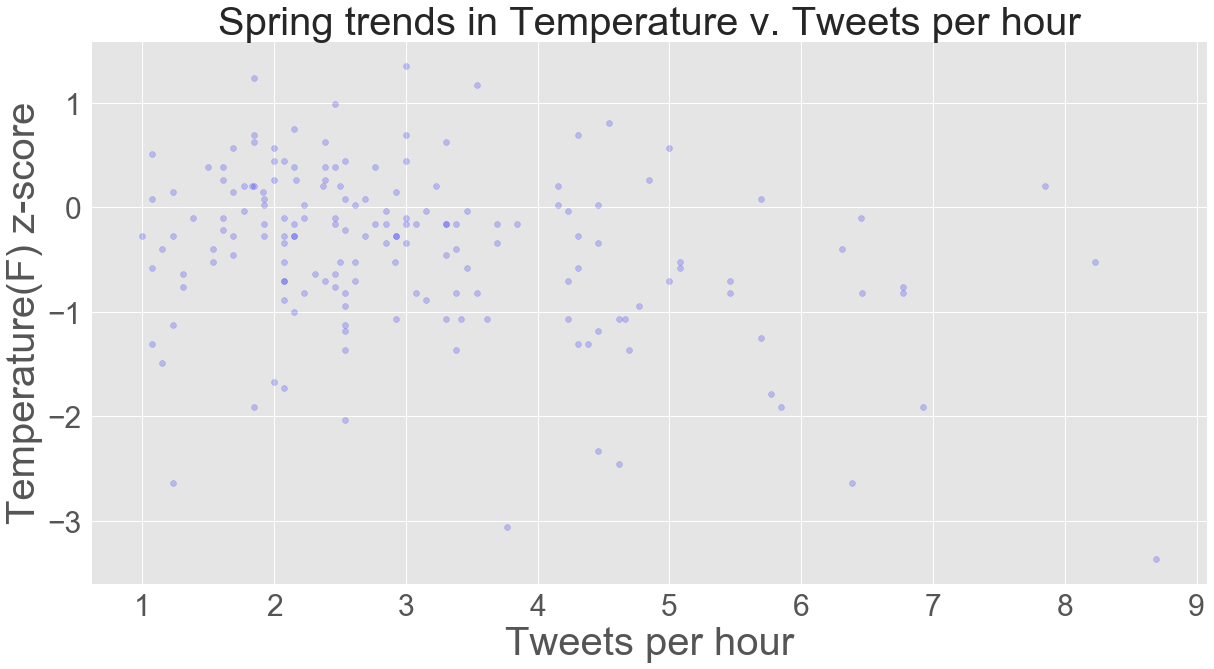

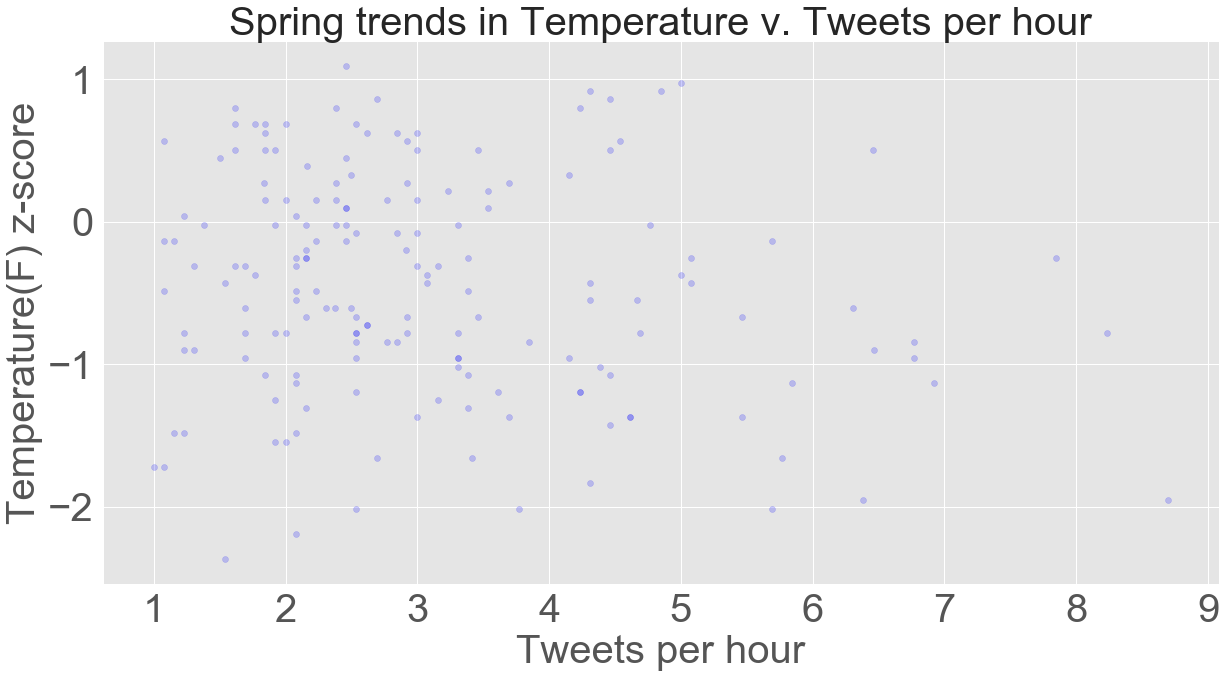

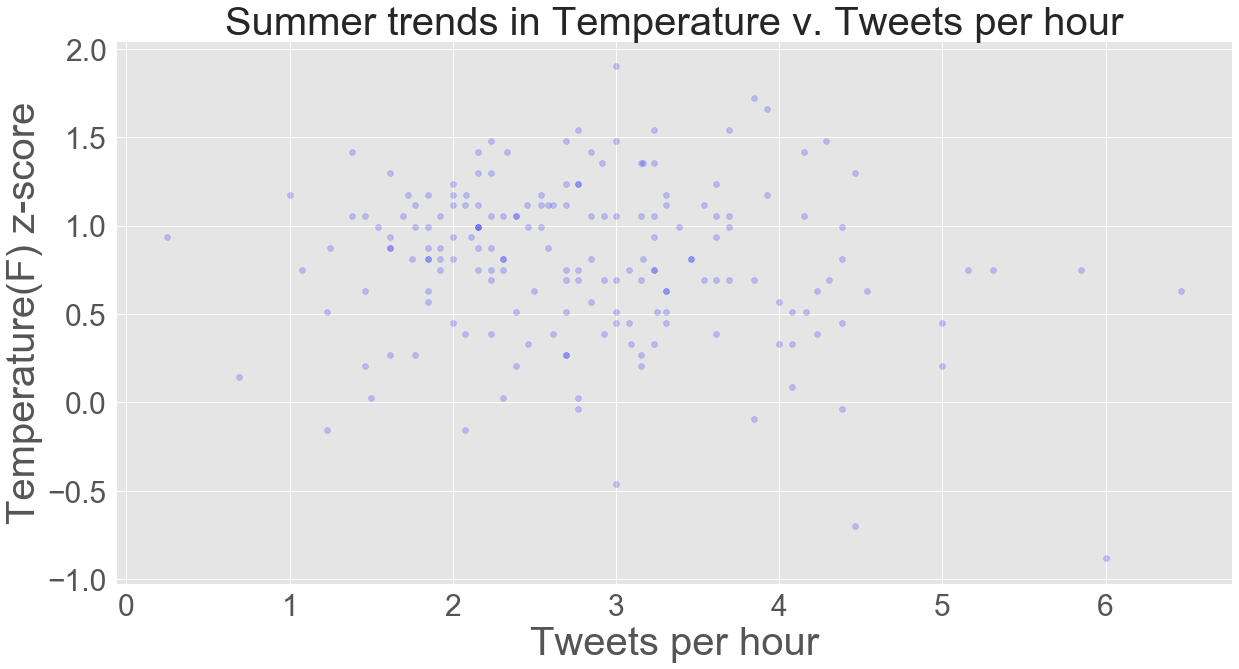

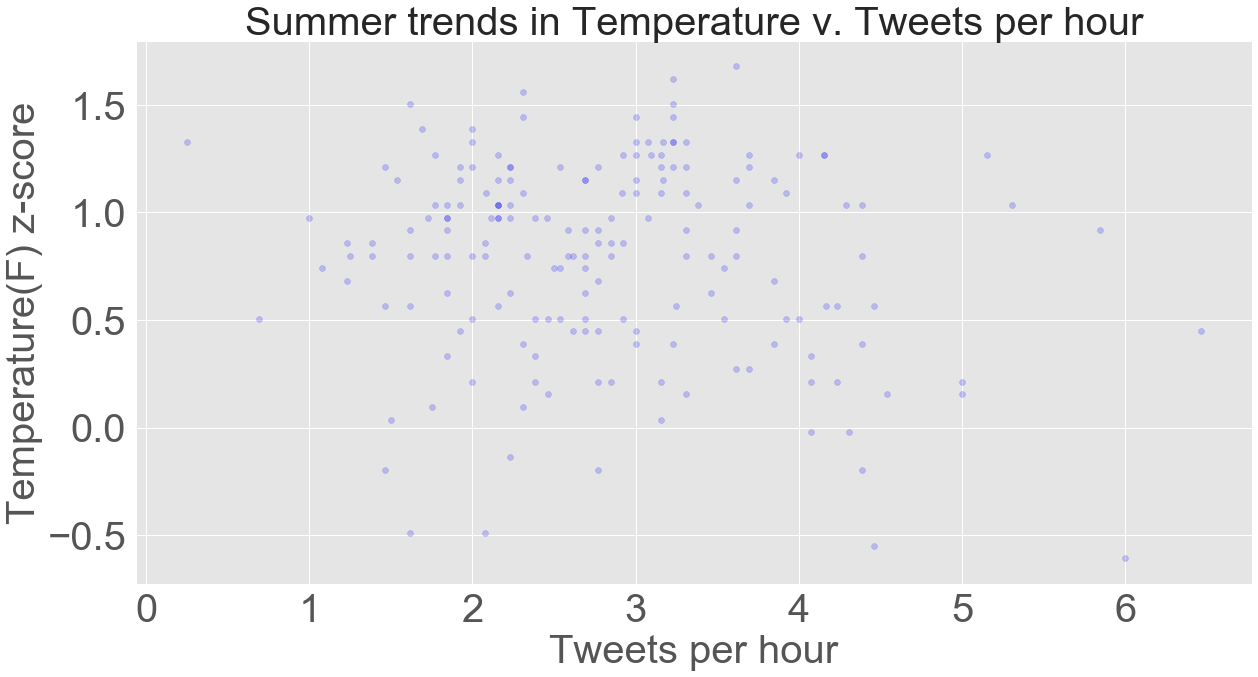

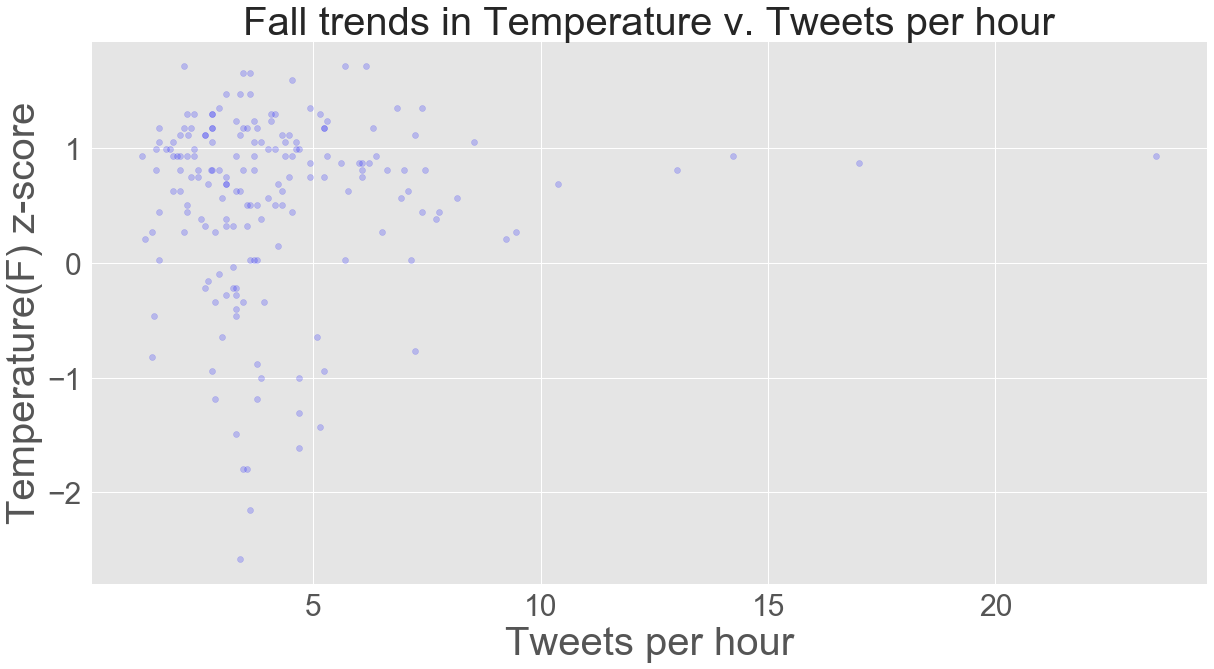

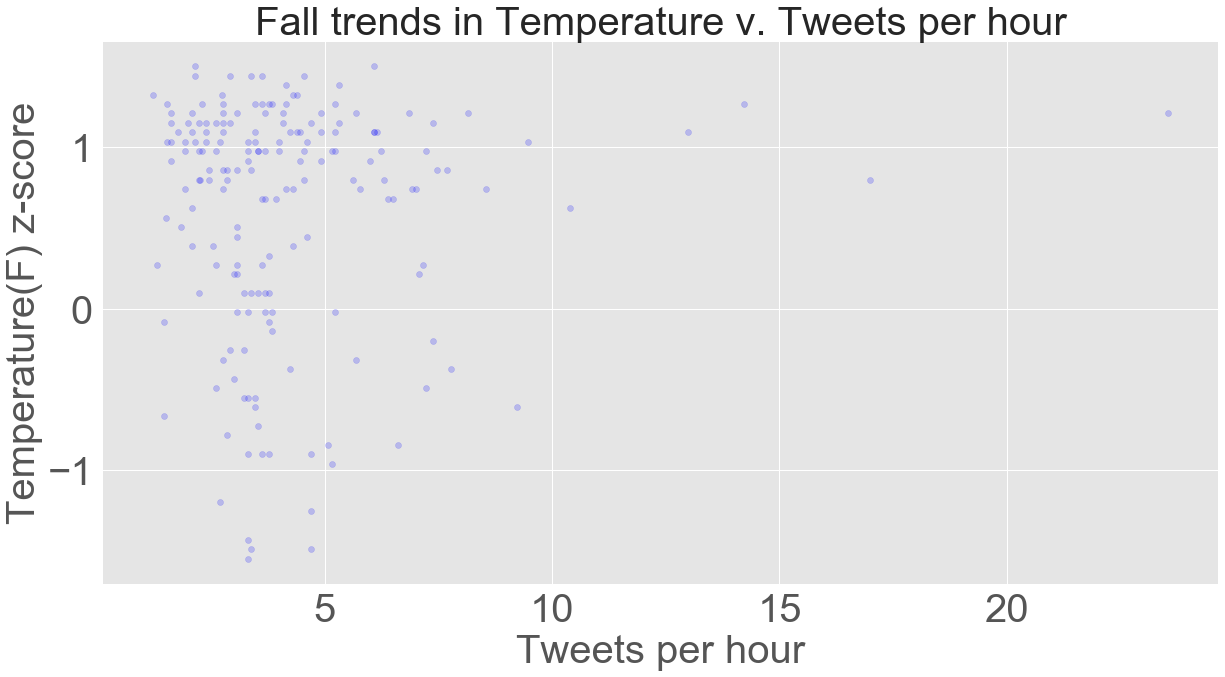

In [80]:
main_state("CA")
main_state("TX")

In [ ]:
cities = ["Los_Angeles", "Berkeley", "Sacramento"]
location = ["LOS ANGELES INTERNATIONAL AIRPORT, CA US", "BERKELEY, CA US", "SACRAMENTO METROPOLITAN AIRPORT, CA US"]

for i in range(len(cities)):
    main_city("CA", cities[i], location[i])


# Massachusetts


In [16]:
main_state("MA")

FileNotFoundError: File b'/Users/lindseytam/Desktop/climate_bias/data/weather/MA_weather.csv' does not exist

In [ ]:
weather = pd.read_csv(r"/Users/lindseytam/Desktop/weather/MA_weather.csv")
cities = ["Boston", "Brockton", "Worcester"]
location = ["BOSTON, MA US", "BROCKTON, MA US", "WORCESTER, MA US"]

for i in range(len(cities)):
    main_city("MA", cities[i], location[i])

# Texas

In [ ]:
main_state("TX")

In [ ]:
cities = ["Dallas", "San_Antonio", "Houston"]
location = ['DALLAS REDBIRD AIRPORT, TX US', "SAN ANTONIO INTERNATIONAL AIRPORT, TX US", "HOUSTON WILLIAM P HOBBY AIRPORT, TX US"]

for i in range(len(cities)):
    main_city("TX", cities[i], location[i])
